# Real Estate
# Project Task: Week 1
### df_train Import and Preparation:
1. Import df_train.
2. Figure out the primary key and look for the requirement of indexing.
3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

### Exploratory df_train Analysis (EDA):
4. Perform debt analysis. You may take the following steps:
    
    a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent
    
    b) Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage 
    
    c) Create pie charts to show overall debt and bad debt
    
    d) Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities
    
    e) Create a collated income distribution chart for family income, house hold income, and remaining income
    
# Project Task: Week 2
### Exploratory Data Analysis (EDA):

1. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

    a) Use pop and ALand variables to create a new field called population density

    b) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age 
    
    c) Visualize the findings using appropriate chart type

2. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

    a) Analyze the married, separated, and divorced population for these population brackets

    b) Visualize using appropriate chart type

3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

4. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

# Project Task: Week 3
### Data Pre-processing:

1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 

2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent      random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain          insight into the linear relationships in the data. Following are the list of latent variables:

    • Highschool graduation rates

    • Median population age

    • Second mortgage statistics

    • Percent own

    • Bad debt expense

# Project Task: Week 4
### Data Modeling :

1. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly     mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.

    a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

    b) Run another model at State level. There are 52 states in USA.

    c) Keep below considerations while building a linear regression model. Data Modeling :

        • Variables should have significant impact on predicting Monthly mortgage and owner costs

        • Utilize all predictor variable to start with initial hypothesis

        • R square of 60 percent and above should be achieved

        • Ensure Multi-collinearity does not exist in dependent variables

        • Test if predicted variable is normally distributed

### Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

    a) Box plot of distribution of average rent by type of place (village, urban, town, etc.).

    b) Pie charts to show overall debt and bad debt.

    c) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map.

    d) Heat map for correlation matrix.

    e) Pie chart to show the population distribution across different types of places (village, urban, town etc.)

# Week 1
### df_train Import and Preparation:
### 1. Import df_train.

In [1]:
# Import df_train & libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the df_train
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print("Shape of train df_train:",df_train.shape)
print("Shape of test df_train:",df_test.shape)

Shape of train df_train: (27321, 80)
Shape of test df_train: (11709, 80)


### 2. Figure out the primary key and look for the requirement of indexing.

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [5]:
print(df_train.shape)
df_train['UID'].nunique()

(27321, 80)


27161

In [6]:
print(df_test.shape)
df_test['UID'].nunique()

(11709, 80)


11677

After checking the Feature 'UID' we can conclude that it is the primary key. But there are duplicate records with same UID so we need to remove those duplicate records

In [7]:
df_train.UID.nunique()

27161

In [8]:
df_test.UID.nunique()

11677

In [9]:
grp_train = df_train.groupby('UID')
grp_train.size().sort_values(ascending=False).head(60)
# grp_train.get_group(282028)
grp_train.get_group(230058)

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID       state state_ab  \
777    230058      NaN       140        73        6  California       CA   
1623   230058      NaN       140        73        6  California       CA   
17489  230058      NaN       140        73        6  California       CA   
26046  230058      NaN       140        73        6  California       CA   

            city                 place  type  ... female_age_mean  \
777    Oceanside  Camp Pendleton North  City  ...        19.99315   
1623   Oceanside  Camp Pendleton North  City  ...        19.99315   
17489  Oceanside  Camp Pendleton North  City  ...        19.99315   
26046  Oceanside  Camp Pendleton North  City  ...        19.99315   

       female_age_median  female_age_stdev  female_age_sample_weight  \
777             22.41667          11.62088                3406.53918   
1623            22.41667          11.62088                3406.53918   
17489           22.41667          11.62088                3406.53918   
26046           22.41667          11.62088                3406.53918   

       female_age_samples  pct_own  married  married_snp  separated  divorced  
777               11492.0  0.00107  0.33566      0.07245     0.0025   0.01032  
1623              11492.0  0.00107  0.33566      0.07245     0.0025   0.01032  
17489             11492.0  0.00107  0.33566      0.07245     0.0025   0.01032  
26046             11492.0  0.00107  0.33566      0.07245     0.0025   0.01032  

[4 rows x 80 columns]

In [10]:
grp_test = df_train.groupby('UID')
grp_test.size().sort_values(ascending=False).head(60)
# grp_test.get_group(282028)
grp_test.get_group(230058)

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID       state state_ab  \
777    230058      NaN       140        73        6  California       CA   
1623   230058      NaN       140        73        6  California       CA   
17489  230058      NaN       140        73        6  California       CA   
26046  230058      NaN       140        73        6  California       CA   

            city                 place  type  ... female_age_mean  \
777    Oceanside  Camp Pendleton North  City  ...        19.99315   
1623   Oceanside  Camp Pendleton North  City  ...        19.99315   
17489  Oceanside  Camp Pendleton North  City  ...        19.99315   
26046  Oceanside  Camp Pendleton North  City  ...        19.99315   

       female_age_median  female_age_stdev  female_age_sample_weight  \
777             22.41667          11.62088                3406.53918   
1623            22.41667          11.62088                3406.53918   
17489           22.41667          11.62088                3406.53918   
26046           22.41667          11.62088                3406.53918   

       female_age_samples  pct_own  married  married_snp  separated  divorced  
777               11492.0  0.00107  0.33566      0.07245     0.0025   0.01032  
1623              11492.0  0.00107  0.33566      0.07245     0.0025   0.01032  
17489             11492.0  0.00107  0.33566      0.07245     0.0025   0.01032  
26046             11492.0  0.00107  0.33566      0.07245     0.0025   0.01032  

[4 rows x 80 columns]

In [11]:
#Dropping the duplicate values
print("Before dropping the duplicates the total rows are:", df_train.shape[0], "Shape:", df_train.shape)
df_train.drop_duplicates(keep ='first', inplace = True)
print("After dropping the duplicates the total rows are:", df_train.shape[0], "Shape:", df_train.shape)

Before dropping the duplicates the total rows are: 27321 Shape: (27321, 80)
After dropping the duplicates the total rows are: 27161 Shape: (27161, 80)


In [12]:
#Dropping the duplicate values
print("Before dropping the duplicates the total rows are:", df_test.shape[0], "Shape:", df_test.shape)
df_test.drop_duplicates(keep ='first', inplace = True)
print("After dropping the duplicates the total rows are:", df_test.shape[0], "Shape:", df_test.shape)

Before dropping the duplicates the total rows are: 11709 Shape: (11709, 80)
After dropping the duplicates the total rows are: 11677 Shape: (11677, 80)


Now we can set the UID as the index

In [13]:
# backup
week1_bck_train = df_train.copy()
week1_bck_test = df_test.copy()

In [14]:
df_train.set_index('UID', inplace=True)
df_test.set_index('UID', inplace=True)

In [15]:
df_train

BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
UID                                                                   
267822      NaN       140        53       36      New York       NY   
246444      NaN       140       141       18       Indiana       IN   
245683      NaN       140        63       18       Indiana       IN   
279653      NaN       140       127       72   Puerto Rico       PR   
247218      NaN       140       161       20        Kansas       KS   
...         ...       ...       ...      ...           ...      ...   
279212      NaN       140        43       72   Puerto Rico       PR   
277856      NaN       140        91       42  Pennsylvania       PA   
233000      NaN       140        87        8      Colorado       CO   
287425      NaN       140       439       48         Texas       TX   
265371      NaN       140         3       32        Nevada       NV   

               city             place     type primary  ...  female_age_mean  \
UID                                                     ...                    
267822     Hamilton          Hamilton     City   tract  ...         44.48629   
246444   South Bend          Roseland     City   tract  ...         36.48391   
245683     Danville          Danville     City   tract  ...         42.15810   
279653     San Juan          Guaynabo    Urban   tract  ...         47.77526   
247218    Manhattan    Manhattan City     City   tract  ...         24.17693   
...             ...               ...      ...     ...  ...              ...   
279212        Coamo             Coamo    Urban   tract  ...         42.73154   
277856    Blue Bell         Blue Bell  Borough   tract  ...         38.21269   
233000      Weldona      Saddle Ridge     City   tract  ...         43.40218   
287425  Colleyville  Colleyville City     Town   tract  ...         39.25921   
265371    Las Vegas          Paradise     City   tract  ...         34.45345   

        female_age_median  female_age_stdev  female_age_sample_weight  \
UID                                                                     
267822           45.33333          22.51276                 685.33845   
246444           37.58333          23.43353                 267.23367   
245683           42.83333          23.94119                 707.01963   
279653           50.58333          24.32015                 362.20193   
247218           21.58333          11.10484                1854.48652   
...                   ...               ...                       ...   
279212           40.16667          24.79821                 230.87898   
277856           39.50000          21.84826                 496.20427   
233000           46.33333          23.40858                 316.52078   
287425           43.41667          21.36235                1373.94120   
265371           29.83333          19.77208                 526.73261   

        female_age_samples  pct_own  married  married_snp  separated  divorced  
UID                                                                             
267822              2618.0  0.79046  0.57851      0.01882    0.01240   0.08770  
246444              1284.0  0.52483  0.34886      0.01426    0.01426   0.09030  
245683              3238.0  0.85331  0.64745      0.02830    0.01607   0.10657  
279653              1559.0  0.65037  0.47257      0.02021    0.02021   0.10106  
247218              3051.0  0.13046  0.12356      0.00000    0.00000   0.03109  
...                    ...      ...      ...          ...        ...       ...  
279212               938.0  0.60422  0.24603      0.03042    0.02249   0.14683  
277856              2039.0  0.68072  0.61127      0.05003    0.02473   0.04888  
233000              1364.0  0.78508  0.70451      0.01386    0.00520   0.07712  
287425              5815.0  0.93970  0.75503      0.02287    0.00915   0.05261  
265371              1911.0  0.27912  0.34426      0.03825    0.03005   0.13320  

[27161 rows x 79 columns]

In [16]:
df_test

BLOCKID  SUMLEVEL  COUNTYID  STATEID          state state_ab  \
UID                                                                    
255504      NaN       140       163       26       Michigan       MI   
252676      NaN       140         1       23          Maine       ME   
276314      NaN       140        15       42   Pennsylvania       PA   
248614      NaN       140       231       21       Kentucky       KY   
286865      NaN       140       355       48          Texas       TX   
...         ...       ...       ...      ...            ...      ...   
238088      NaN       140       105       12        Florida       FL   
242811      NaN       140        31       17       Illinois       IL   
250127      NaN       140         9       25  Massachusetts       MA   
241096      NaN       140        27       19           Iowa       IA   
287763      NaN       140       453       48          Texas       TX   

                  city                  place     type primary  ...  \
UID                                                             ...   
255504         Detroit  Dearborn Heights City      CDP   tract  ...   
252676          Auburn            Auburn City     City   tract  ...   
276314       Pine City              Millerton  Borough   tract  ...   
248614      Monticello        Monticello City     City   tract  ...   
286865  Corpus Christi                  Edroy     Town   tract  ...   
...                ...                    ...      ...     ...  ...   
238088        Lakeland        Crystal Springs     City   tract  ...   
242811         Chicago           Chicago City  Village   tract  ...   
250127        Lawrence      Methuen Town City     City   tract  ...   
241096         Carroll           Carroll City     City   tract  ...   
287763          Austin     Sunset Valley City     Town   tract  ...   

        female_age_mean  female_age_median  female_age_stdev  \
UID                                                            
255504         34.78682           33.75000          21.58531   
252676         44.23451           46.66667          22.37036   
276314         41.62426           44.50000          22.86213   
248614         44.81200           48.00000          21.03155   
286865         40.66618           42.66667          21.30900   
...                 ...                ...               ...   
238088         53.51255           59.58333          23.23426   
242811         33.14169           32.83333          20.24698   
250127         43.53905           43.66667          23.17995   
241096         45.63179           48.16667          24.84209   
287763         35.99955           35.41667          20.68049   

        female_age_sample_weight  female_age_samples  pct_own  married  \
UID                                                                      
255504                 416.48097              1938.0  0.70252  0.28217   
252676                 532.03505              1950.0  0.85128  0.64221   
276314                 453.11959              1879.0  0.81897  0.59961   
248614                 263.94320              1081.0  0.84609  0.56953   
286865                 709.90829              2956.0  0.79077  0.57620   
...                          ...                 ...      ...      ...   
238088                 699.33353              2914.0  0.93121  0.65969   
242811                 306.63915              1191.0  0.33122  0.42882   
250127                 900.13903              3723.0  0.84372  0.50269   
241096                 693.82905              3213.0  0.83330  0.66699   
287763                 559.30291              2047.0  0.52587  0.51922   

        married_snp  separated  divorced  
UID                                       
255504      0.05910    0.03813   0.14299  
252676      0.02338    0.00000   0.13377  
276314      0.01746    0.01358   0.10026  
248614      0.05492    0.04694   0.12489  
286865      0.01726    0.00588   0.16379  
...             ...        ...       ...  
238088 

### 3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [17]:
filter0 = (((df_train.isnull().sum()/df_train.shape[0])*100)>0)
df_delcols_train = df_train.loc[:,filter0.values]
print(df_delcols_train.isnull().sum()/df_delcols_train.shape[0]*100)
print("*"*41)
filter1 = (((df_test.isnull().sum()/df_test.shape[0])*100)>0)
df_delcols_test = df_test.loc[:,filter1.values]
print(df_delcols_test.isnull().sum()/df_delcols_test.shape[0]*100)

BLOCKID                        100.000000
rent_mean                        0.890983
rent_median                      0.890983
rent_stdev                       0.890983
rent_sample_weight               0.890983
rent_samples                     0.890983
rent_gt_10                       0.890983
rent_gt_15                       0.890983
rent_gt_20                       0.890983
rent_gt_25                       0.890983
rent_gt_30                       0.890983
rent_gt_35                       0.890983
rent_gt_40                       0.890983
rent_gt_50                       0.890983
hi_mean                          0.762122
hi_median                        0.762122
hi_stdev                         0.762122
hi_sample_weight                 0.762122
hi_samples                       0.762122
family_mean                      0.846802
family_median                    0.846802
family_stdev                     0.846802
family_sample_weight             0.846802
family_samples                   0

#### Dropping Following features:
-'BLOCKID' as it is having all null values and 'SUMLEVEL' as well as 'primary' feature as it is having only 1 entry.

In [18]:
df_train.SUMLEVEL.nunique()

1

In [19]:
print("Before dropping the feature from train data:",df_train.shape)
df_train.drop(columns = ['BLOCKID','primary', 'SUMLEVEL'], inplace = True)
print("After dropping the feature from train data:",df_train.shape)

print("Before dropping the feature from test data:",df_test.shape)
df_test.drop(columns = ['BLOCKID','primary', 'SUMLEVEL'], inplace = True)
print("After dropping the feature from test data:",df_test.shape)

Before dropping the feature from train data: (27161, 79)
After dropping the feature from train data: (27161, 76)
Before dropping the feature from test data: (11677, 79)
After dropping the feature from test data: (11677, 76)


In [20]:
filter0 = (((df_train.isnull().sum()/df_train.shape[0])*100)>0)
df_delcols_train = df_train.loc[:,filter0.values]
print(df_delcols_train.isnull().sum()/df_delcols_train.shape[0]*100)
print("*"*39)
filter1 = (((df_test.isnull().sum()/df_test.shape[0])*100)>0)
df_delcols_test = df_test.loc[:,filter1.values]
print(df_delcols_test.isnull().sum()/df_delcols_test.shape[0]*100)

rent_mean                      0.890983
rent_median                    0.890983
rent_stdev                     0.890983
rent_sample_weight             0.890983
rent_samples                   0.890983
rent_gt_10                     0.890983
rent_gt_15                     0.890983
rent_gt_20                     0.890983
rent_gt_25                     0.890983
rent_gt_30                     0.890983
rent_gt_35                     0.890983
rent_gt_40                     0.890983
rent_gt_50                     0.890983
hi_mean                        0.762122
hi_median                      0.762122
hi_stdev                       0.762122
hi_sample_weight               0.762122
hi_samples                     0.762122
family_mean                    0.846802
family_median                  0.846802
family_stdev                   0.846802
family_sample_weight           0.846802
family_samples                 0.846802
hc_mortgage_mean               1.627333
hc_mortgage_median             1.627333


In [21]:
df_null_train = df_train[df_train.isna().any(axis=1)]
print("Shape of null df_train:", df_null_train.shape)
df_null_train.head()
df_null_test = df_test[df_test.isna().any(axis=1)]
print("Shape of null df_test:", df_null_test.shape)
df_null_test.head()

Shape of null df_train: (576, 76)
Shape of null df_test: (322, 76)


COUNTYID  STATEID          state state_ab         city  \
UID                                                              
265339         3       32         Nevada       NV    Las Vegas   
287596       451       48          Texas       TX   San Angelo   
250903        25       25  Massachusetts       MA    Cambridge   
287557       441       48          Texas       TX      Abilene   
247510       209       20         Kansas       KS  Kansas City   

                   place  type  zip_code  area_code        lat  ...  \
UID                                                             ...   
265339        Winchester  City     89119        702  36.111448  ...   
287596   San Angelo City  Town     76903        325  31.431831  ...   
250903    Cambridge City  City      2139        617  42.359478  ...   
287557          Tye City  Town     79607        325  32.423876  ...   
247510  Kansas City City  City     66104        913  39.171767  ...   

        female_age_mean  female_age_median  female_age_stdev  \
UID                                                            
265339         33.57247           32.50000          17.36519   
287596         21.40298           20.50000           7.28394   
250903         22.53871           20.75000           7.40442   
287557         22.72458           23.16667           2.18207   
247510              NaN                NaN               NaN   

        female_age_sample_weight  female_age_samples  pct_own  married  \
UID                                                                      
265339                  49.31407               234.0  0.00000  0.22857   
287596                 456.32778               868.0  0.00000  0.22232   
250903                2069.57453              3716.0  0.02169  0.10879   
287557                  26.71180                59.0  0.60000  0.01984   
247510                       NaN                 NaN      NaN      NaN   

        married_snp  separated  divorced  
UID                                       
265339      0.11020    0.06122   0.26327  
287596      0.17475    0.01052   0.00000  
250903      0.05440    0.00204   0.00409  
287557      0.00933    0.00000   0.02217  
247510          NaN        NaN       NaN  

[5 rows x 76 columns]

In [22]:
percent_null_train = (df_null_train.shape[0]/df_train.shape[0])*100
print("% of null in train:",percent_null_train)
percent_null_test = (df_null_test.shape[0]/df_test.shape[0])*100
print("% of null in test:",percent_null_test)

% of null in train: 2.1206877508191893
% of null in test: 2.757557591847221


Now we know that the percentage of NULL data present in the dataset is very low that is 2.12%, which is very low compared to the dataset.

So we can conclude to dropping these null entries as we won't lose much information.

In [23]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [24]:
print(df_train.shape, df_test.shape)

(26585, 76) (11355, 76)


## 4. Perform debt analysis. You may take the following steps:
#### a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

##### Using SQL

In [25]:
from pandasql import sqldf

In [26]:
query1 = "SELECT place, pct_own, second_mortgage, lat, lng FROM df_train where pct_own > 0.10 AND second_mortgage < 0.5 ORDER BY second_mortgage DESC LIMIT 2500;"

query_func = lambda q : sqldf(q, globals())

top_2500 = query_func(query1)

In [27]:
top_2500

place  pct_own  second_mortgage        lat         lng
0      Worcester City  0.20247          0.43363  42.254262  -71.800347
1        Harbor Hills  0.15618          0.31818  40.751809  -73.853582
2         Glen Burnie  0.22380          0.30212  39.127273  -76.635265
3     Egypt Lake-leto  0.11618          0.28972  28.029063  -82.495395
4         Lincolnwood  0.14228          0.28899  41.967289  -87.652434
...               ...      ...              ...        ...         ...
2495       Cutler Bay  0.50519          0.06813  25.550391  -80.347791
2496      Jacksonburg  0.92888          0.06812  39.556756  -84.443252
2497      Keller City  0.97987          0.06812  32.913822  -97.204310
2498     Mays Landing  0.70642          0.06810  39.432879  -74.686137
2499     Oakland City  0.35225          0.06805  37.766197 -122.182303

[2500 rows x 5 columns]

In [28]:
top_2500.pct_own.max()

0.99249

In [29]:
top_2500.second_mortgage.max()

0.43363

In the above steps, we first write include the sqldf function from the pandasql library and then we write the query where we specify that the percent ownership should be greater than 10% and the upper limit of second_mortgage to 50% & sorting the data in descending order of the 'second_mortgage' & limiting the records to 2500.

In [30]:
import plotly.express as px
import plotly.graph_objects as go

In [31]:
#Using graph objects
fig = go.Figure(data=go.Scattergeo(
    lat = top_2500['lat'],
    lon = top_2500['lng']),)
fig.update_traces(marker=dict(size=5))
fig.update_layout(geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ), title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent')
fig.update_geos(
    projection_type="orthographic",
    resolution=50,
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue")
fig.show()

In [32]:
#using Express
geo_df = pd.DataFrame(dict(lat=top_2500['lat'], lon=top_2500['lng'], subreg=top_2500['second_mortgage']))
fig = px.scatter_geo(geo_df, lat="lat", lon="lon", color="subreg", height= 600, projection = "orthographic", 
                     title="Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent")
fig.update_geos(
    projection_type="orthographic",
    resolution=110,
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue"
)
fig.show()

#### b) Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage 

In [33]:
df_train['BAD_DEBT'] = df_train['second_mortgage'] + df_train['home_equity'] - df_train['home_equity_second_mortgage']
df_train

COUNTYID  STATEID         state state_ab         city  \
UID                                                             
267822        53       36      New York       NY     Hamilton   
246444       141       18       Indiana       IN   South Bend   
245683        63       18       Indiana       IN     Danville   
279653       127       72   Puerto Rico       PR     San Juan   
247218       161       20        Kansas       KS    Manhattan   
...          ...      ...           ...      ...          ...   
279212        43       72   Puerto Rico       PR        Coamo   
277856        91       42  Pennsylvania       PA    Blue Bell   
233000        87        8      Colorado       CO      Weldona   
287425       439       48         Texas       TX  Colleyville   
265371         3       32        Nevada       NV    Las Vegas   

                   place     type  zip_code  area_code        lat  ...  \
UID                                                                ...   
267822          Hamilton     City     13346        315  42.840812  ...   
246444          Roseland     City     46616        574  41.701441  ...   
245683          Danville     City     46122        317  39.792202  ...   
279653          Guaynabo    Urban       927        787  18.396103  ...   
247218    Manhattan City     City     66502        785  39.195573  ...   
...                  ...      ...       ...        ...        ...  ...   
279212             Coamo    Urban       769        787  18.076060  ...   
277856         Blue Bell  Borough     19422        215  40.158138  ...   
233000      Saddle Ridge     City     80653        970  40.410316  ...   
287425  Colleyville City     Town     76034        817  32.904866  ...   
265371          Paradise     City     89123        702  36.064754  ...   

        female_age_median  female_age_stdev  female_age_sample_weight  \
UID                                                                     
267822           45.33333          22.51276                 685.33845   
246444           37.58333          23.43353                 267.23367   
245683           42.83333          23.94119                 707.01963   
279653           50.58333          24.32015                 362.20193   
247218           21.58333          11.10484                1854.48652   
...                   ...               ...                       ...   
279212           40.16667          24.79821                 230.87898   
277856           39.50000          21.84826                 496.20427   
233000           46.33333          23.40858                 316.52078   
287425           43.41667          21.36235                1373.94120   
265371           29.83333          19.77208                 526.73261   

        female_age_samples  pct_own  married  married_snp  separated  \
UID                                                                    
267822              2618.0  0.79046  0.57851      0.01882    0.01240   
246444              1284.0  0.52483  0.34886      0.01426    0.01426   
245683              3238.0  0.85331  0.64745      0.02830    0.01607   
279653              1559.0  0.65037  0.47257      0.02021    0.02021   
247218              3051.0  0.13046  0.12356      0.00000    0.00000   
...                    ...      ...      ...          ...        ...   
279212               938.0  0.60422  0.24603      0.03042    0.02249   
277856              2039.0  0.68072  0.61127      0.05003    0.02473   
233000              1364.0  0.78508  0.70451      0.01386    0.00520   
287425              5815.0  0.93970  0.75503      0.02287    0.00915   
265371              1911.0  0.27912  0.34426      0.03825    0.03005   

        divorced  BAD_DEBT  
UID                         
267822   0.08770   0.09408  
246444   0.09030   0.04274  
245683   0.10657   0.09512  
279653   0.10106   0.01086  
247218   0.03109   0.05426  
...          ...       ...  
279212   0.14683   0.00000  
277856   0.04888   0.20908  
233000   0.07712   0.0

#### c) Create pie charts to show overall debt and bad debt

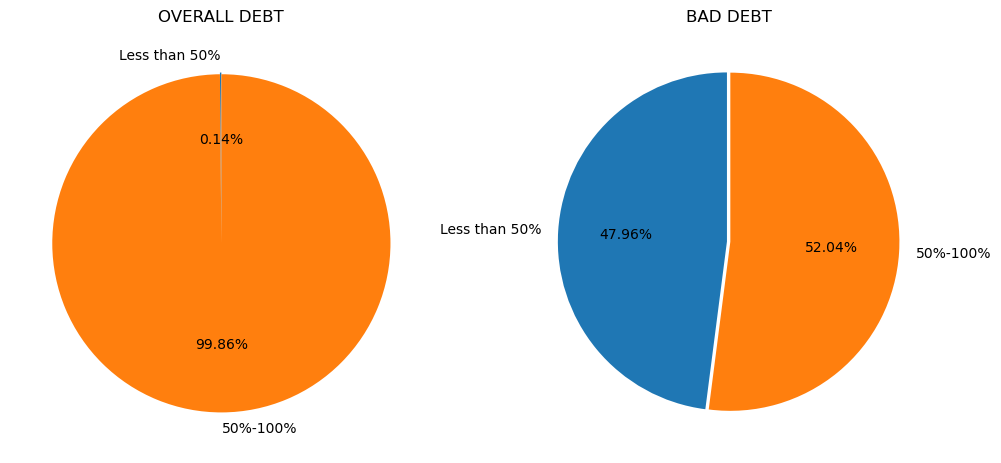

In [34]:
df_train['BINS_OD'] = pd.cut(df_train['debt'], bins=[0,0.10,1], labels=['Less than 50%', '50%-100%'])
df_train['BINS_BD'] = pd.cut(df_train['BAD_DEBT'], bins=[0,0.10,1], labels=['Less than 50%', '50%-100%'])

pop1=(0,0.01)
pop2=(0.01,0.01)
plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,2,1)
plt.title('OVERALL DEBT')
df_train.groupby(['BINS_OD']).size().plot(kind = 'pie', subplots=True, startangle = 90, autopct = '%1.2f%%', explode = pop1)
plt.ylabel("")
plt.subplot(1,2,2)
plt.title('BAD DEBT')
df_train.groupby(['BINS_BD']).size().plot(kind = 'pie', subplots=True, startangle = 90, autopct = '%1.2f%%', explode = pop2)
plt.ylabel("")
plt.show()

#### d) Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [35]:
city = df_train.city.value_counts()
city_top_10 = city.head(10)
city_top_10.index

Index(['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami'],
      dtype='object')

In [36]:
df_train['GOOD_DEBT'] = 1 - df_train.BAD_DEBT
df_train

COUNTYID  STATEID         state state_ab         city  \
UID                                                             
267822        53       36      New York       NY     Hamilton   
246444       141       18       Indiana       IN   South Bend   
245683        63       18       Indiana       IN     Danville   
279653       127       72   Puerto Rico       PR     San Juan   
247218       161       20        Kansas       KS    Manhattan   
...          ...      ...           ...      ...          ...   
279212        43       72   Puerto Rico       PR        Coamo   
277856        91       42  Pennsylvania       PA    Blue Bell   
233000        87        8      Colorado       CO      Weldona   
287425       439       48         Texas       TX  Colleyville   
265371         3       32        Nevada       NV    Las Vegas   

                   place     type  zip_code  area_code        lat  ...  \
UID                                                                ...   
267822          Hamilton     City     13346        315  42.840812  ...   
246444          Roseland     City     46616        574  41.701441  ...   
245683          Danville     City     46122        317  39.792202  ...   
279653          Guaynabo    Urban       927        787  18.396103  ...   
247218    Manhattan City     City     66502        785  39.195573  ...   
...                  ...      ...       ...        ...        ...  ...   
279212             Coamo    Urban       769        787  18.076060  ...   
277856         Blue Bell  Borough     19422        215  40.158138  ...   
233000      Saddle Ridge     City     80653        970  40.410316  ...   
287425  Colleyville City     Town     76034        817  32.904866  ...   
265371          Paradise     City     89123        702  36.064754  ...   

        female_age_samples  pct_own  married  married_snp  separated  \
UID                                                                    
267822              2618.0  0.79046  0.57851      0.01882    0.01240   
246444              1284.0  0.52483  0.34886      0.01426    0.01426   
245683              3238.0  0.85331  0.64745      0.02830    0.01607   
279653              1559.0  0.65037  0.47257      0.02021    0.02021   
247218              3051.0  0.13046  0.12356      0.00000    0.00000   
...                    ...      ...      ...          ...        ...   
279212               938.0  0.60422  0.24603      0.03042    0.02249   
277856              2039.0  0.68072  0.61127      0.05003    0.02473   
233000              1364.0  0.78508  0.70451      0.01386    0.00520   
287425              5815.0  0.93970  0.75503      0.02287    0.00915   
265371              1911.0  0.27912  0.34426      0.03825    0.03005   

        divorced  BAD_DEBT   BINS_OD        BINS_BD  GOOD_DEBT  
UID                                                             
267822   0.08770   0.09408  50%-100%  Less than 50%    0.90592  
246444   0.09030   0.04274  50%-100%  Less than 50%    0.95726  
245683   0.10657   0.09512  50%-100%  Less than 50%    0.90488  
279653   0.10106   0.01086  50%-100%  Less than 50%    0.98914  
247218   0.03109   0.05426  50%-100%  Less than 50%    0.94574  
...          ...       ...       ...            ...        ...  
279212   0.14683   0.00000  50%-100%            NaN    1.00000  
277856   0.04888   0.20908  50%-100%       50%-100%    0.79092  
233000   0.07712   0.07857  50%-100%  Less than 50%    0.92143  
287425   0.05261   0.14305  50%-100%       50%-100%    0.85695  
265371   0.13320   0.18362  50%-100%       50%-100%    0.81638  

[26585 rows x 80 columns]

In [37]:
new_df = df_train[['city','second_mortgage','home_equity','GOOD_DEBT','BAD_DEBT']]
new_df

city  second_mortgage  home_equity  GOOD_DEBT  BAD_DEBT
UID                                                                   
267822     Hamilton          0.02077      0.08919    0.90592   0.09408
246444   South Bend          0.02222      0.04274    0.95726   0.04274
245683     Danville          0.00000      0.09512    0.90488   0.09512
279653     San Juan          0.01086      0.01086    0.98914   0.01086
247218    Manhattan          0.05426      0.05426    0.94574   0.05426
...             ...              ...          ...        ...       ...
279212        Coamo          0.00000      0.00000    1.00000   0.00000
277856    Blue Bell          0.02112      0.19641    0.79092   0.20908
233000      Weldona          0.02024      0.07857    0.92143   0.07857
287425  Colleyville          0.07550      0.12556    0.85695   0.14305
265371    Las Vegas          0.01412      0.18362    0.81638   0.18362

[26585 rows x 5 columns]

In [38]:
new_df = new_df[new_df['city'].isin(city_top_10.index)]
new_df.city.value_counts()

Chicago         286
Brooklyn        261
Los Angeles     219
Houston         213
Philadelphia    160
San Antonio     138
Baltimore       128
Las Vegas       123
Phoenix         114
Miami           105
Name: city, dtype: int64

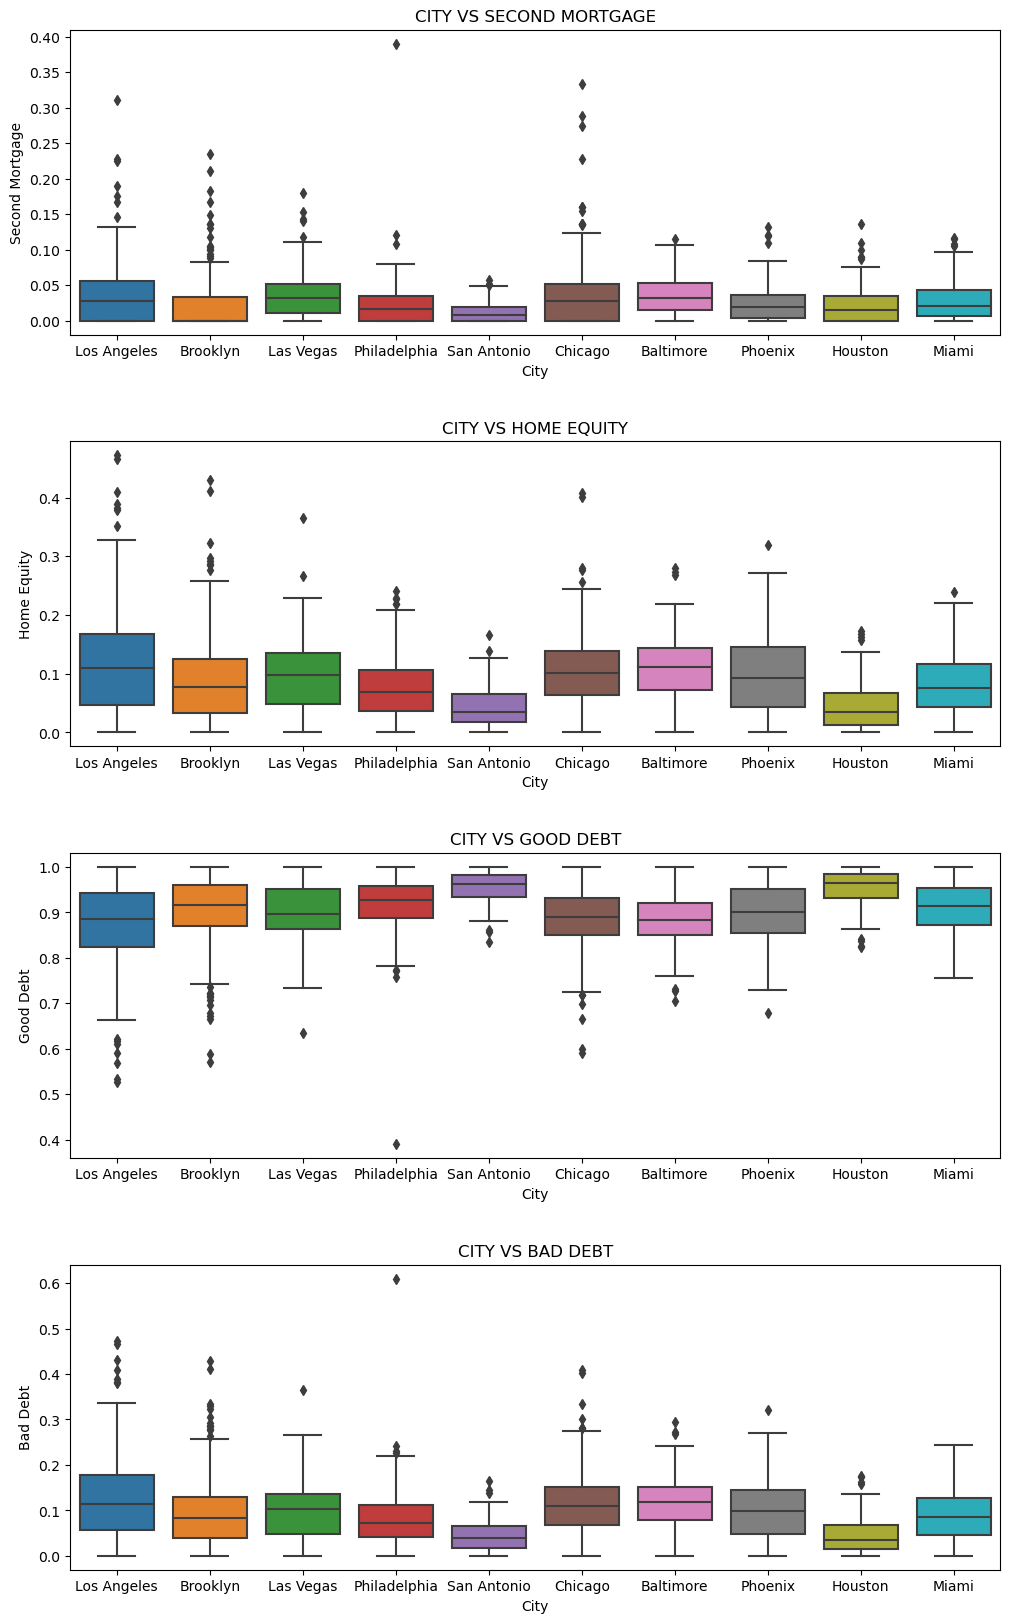

In [39]:
plt.figure(figsize=(12,20))
plt.subplots_adjust(hspace=0.35)

plt.subplot(4,1,1)
plt.title('CITY VS SECOND MORTGAGE')
sns.boxplot(x = 'city', y = 'second_mortgage', data = new_df)
plt.xlabel("City")
plt.ylabel("Second Mortgage")

plt.subplot(4,1,2)
plt.title('CITY VS HOME EQUITY')
sns.boxplot(x = 'city', y = 'home_equity', data = new_df)
plt.xlabel("City")
plt.ylabel("Home Equity")

plt.subplot(4,1,3)
plt.title('CITY VS GOOD DEBT')
sns.boxplot(x = 'city', y = 'GOOD_DEBT', data = new_df)
plt.xlabel("City")
plt.ylabel("Good Debt")

plt.subplot(4,1,4)
plt.title('CITY VS BAD DEBT')
sns.boxplot(x = 'city', y = 'BAD_DEBT', data = new_df)
plt.xlabel("City")
plt.ylabel("Bad Debt")

plt.show()

#### e) Create a collated income distribution chart for family income, house hold income, and remaining income

In [40]:
df_train['Remaning_income'] = df_train['family_median'] - df_train['hi_median']
df_train

COUNTYID  STATEID         state state_ab         city  \
UID                                                             
267822        53       36      New York       NY     Hamilton   
246444       141       18       Indiana       IN   South Bend   
245683        63       18       Indiana       IN     Danville   
279653       127       72   Puerto Rico       PR     San Juan   
247218       161       20        Kansas       KS    Manhattan   
...          ...      ...           ...      ...          ...   
279212        43       72   Puerto Rico       PR        Coamo   
277856        91       42  Pennsylvania       PA    Blue Bell   
233000        87        8      Colorado       CO      Weldona   
287425       439       48         Texas       TX  Colleyville   
265371         3       32        Nevada       NV    Las Vegas   

                   place     type  zip_code  area_code        lat  ...  \
UID                                                                ...   
267822          Hamilton     City     13346        315  42.840812  ...   
246444          Roseland     City     46616        574  41.701441  ...   
245683          Danville     City     46122        317  39.792202  ...   
279653          Guaynabo    Urban       927        787  18.396103  ...   
247218    Manhattan City     City     66502        785  39.195573  ...   
...                  ...      ...       ...        ...        ...  ...   
279212             Coamo    Urban       769        787  18.076060  ...   
277856         Blue Bell  Borough     19422        215  40.158138  ...   
233000      Saddle Ridge     City     80653        970  40.410316  ...   
287425  Colleyville City     Town     76034        817  32.904866  ...   
265371          Paradise     City     89123        702  36.064754  ...   

        pct_own  married  married_snp  separated  divorced  BAD_DEBT  \
UID                                                                    
267822  0.79046  0.57851      0.01882    0.01240   0.08770   0.09408   
246444  0.52483  0.34886      0.01426    0.01426   0.09030   0.04274   
245683  0.85331  0.64745      0.02830    0.01607   0.10657   0.09512   
279653  0.65037  0.47257      0.02021    0.02021   0.10106   0.01086   
247218  0.13046  0.12356      0.00000    0.00000   0.03109   0.05426   
...         ...      ...          ...        ...       ...       ...   
279212  0.60422  0.24603      0.03042    0.02249   0.14683   0.00000   
277856  0.68072  0.61127      0.05003    0.02473   0.04888   0.20908   
233000  0.78508  0.70451      0.01386    0.00520   0.07712   0.07857   
287425  0.93970  0.75503      0.02287    0.00915   0.05261   0.14305   
265371  0.27912  0.34426      0.03825    0.03005   0.13320   0.18362   

         BINS_OD        BINS_BD  GOOD_DEBT  Remaning_income  
UID                                                          
267822  50%-100%  Less than 50%    0.90592           5125.0  
246444  50%-100%  Less than 50%    0.95726           7837.0  
245683  50%-100%  Less than 50%    0.90488          10431.0  
279653  50%-100%  Less than 50%    0.98914           6554.0  
247218  50%-100%  Less than 50%    0.94574          27775.0  
...          ...            ...        ...              ...  
279212  50%-100%            NaN    1.00000           3443.0  
277856  50%-100%       50%-100%    0.79092           5029.0  
233000  50%-100%  Less than 50%    0.92143           8514.0  
287425  50%-100%       50%-100%    0.85695          27404.0  
265371  50%-100%       50%-100%    0.81638           4472.0  

[26585 rows x 81 columns]

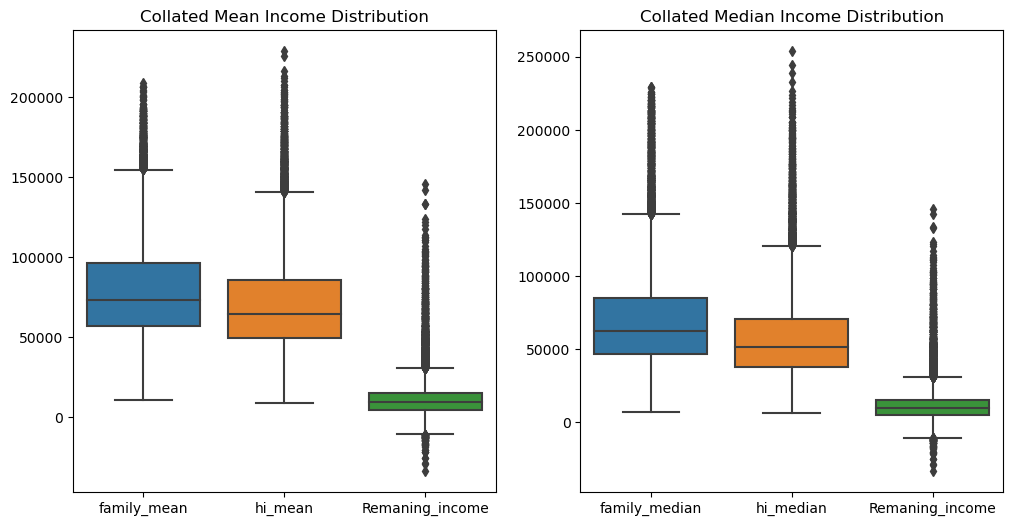

In [41]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=0.20)
plt.subplot(1,2,1)
sns.boxplot(data = df_train[['family_mean', 'hi_mean', 'Remaning_income']])
plt.title("Collated Mean Income Distribution")
plt.subplot(1,2,2)
sns.boxplot(data = df_train[['family_median', 'hi_median', 'Remaning_income']])
plt.title("Collated Median Income Distribution")
plt.show()

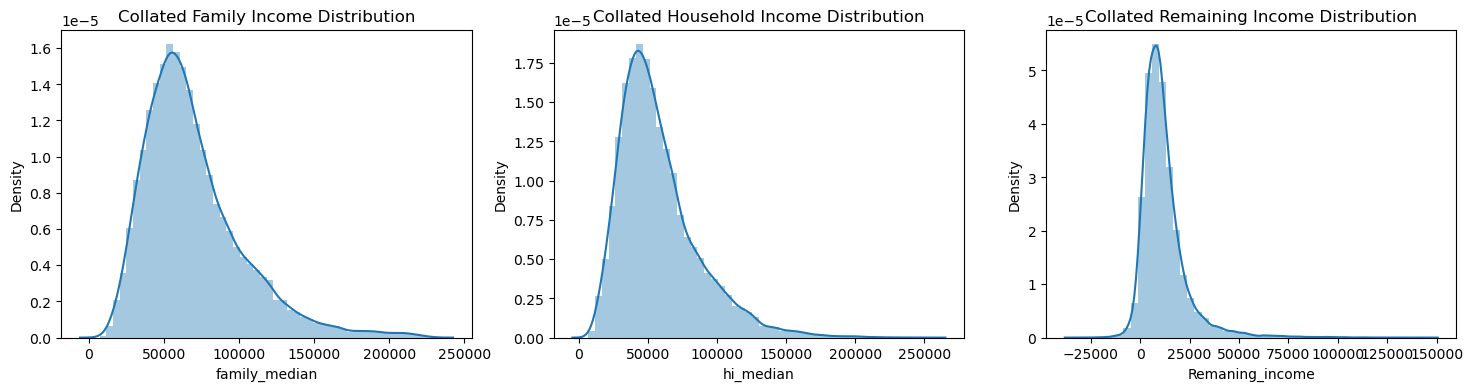

In [42]:
plt.figure(figsize=(18,4))
plt.subplots_adjust(wspace=0.20)
plt.subplot(1,3,1)
sns.distplot(df_train['family_median'])
plt.title("Collated Family Income Distribution")
plt.subplot(1,3,2)
sns.distplot(df_train['hi_median'])
plt.title("Collated Household Income Distribution")
plt.subplot(1,3,3)
sns.distplot(df_train['Remaning_income'])
plt.title("Collated Remaining Income Distribution")
plt.show()

# Week 2
### Exploratory Data Analysis (EDA):

### 1. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

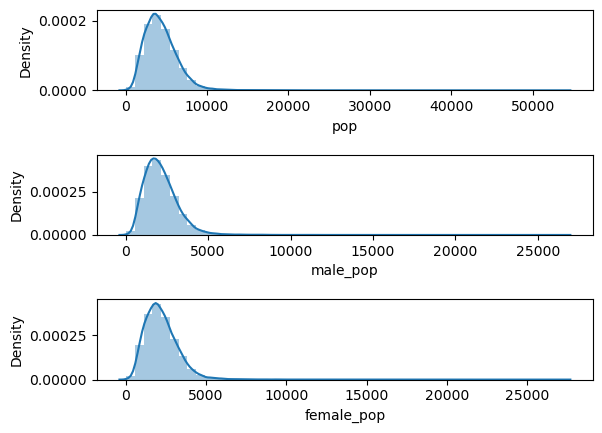

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
sns.distplot(df_train['pop'], ax = ax1)
sns.distplot(df_train['male_pop'], ax = ax2)
sns.distplot(df_train['female_pop'], ax = ax3)
plt.subplots_adjust(hspace=0.8)
plt.show()

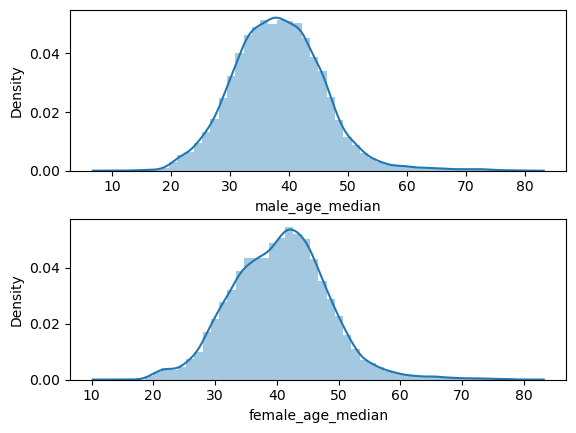

In [44]:
fig, (ax1, ax2) = plt.subplots(2,1)
sns.distplot(df_train['male_age_median'], ax = ax1)
sns.distplot(df_train['female_age_median'], ax = ax2)
plt.subplots_adjust(hspace=0.30)
plt.show()

#### a) Use pop and ALand variables to create a new field called population density

In [45]:
df_train['pop_density'] = df_train['pop']/df_train['ALand']
df_test['pop_density'] = df_test['pop']/df_test['ALand']
df_train.head()

COUNTYID  STATEID        state state_ab        city           place  \
UID                                                                           
267822        53       36     New York       NY    Hamilton        Hamilton   
246444       141       18      Indiana       IN  South Bend        Roseland   
245683        63       18      Indiana       IN    Danville        Danville   
279653       127       72  Puerto Rico       PR    San Juan        Guaynabo   
247218       161       20       Kansas       KS   Manhattan  Manhattan City   

         type  zip_code  area_code        lat  ...  married  married_snp  \
UID                                            ...                         
267822   City     13346        315  42.840812  ...  0.57851      0.01882   
246444   City     46616        574  41.701441  ...  0.34886      0.01426   
245683   City     46122        317  39.792202  ...  0.64745      0.02830   
279653  Urban       927        787  18.396103  ...  0.47257      0.02021   
247218   City     66502        785  39.195573  ...  0.12356      0.00000   

        separated  divorced  BAD_DEBT   BINS_OD        BINS_BD  GOOD_DEBT  \
UID                                                                         
267822    0.01240   0.08770   0.09408  50%-100%  Less than 50%    0.90592   
246444    0.01426   0.09030   0.04274  50%-100%  Less than 50%    0.95726   
245683    0.01607   0.10657   0.09512  50%-100%  Less than 50%    0.90488   
279653    0.02021   0.10106   0.01086  50%-100%  Less than 50%    0.98914   
247218    0.00000   0.03109   0.05426  50%-100%  Less than 50%    0.94574   

        Remaning_income  pop_density  
UID                                   
267822           5125.0     0.000026  
246444           7837.0     0.001687  
245683          10431.0     0.000099  
279653           6554.0     0.002442  
247218          27775.0     0.002207  

[5 rows x 82 columns]

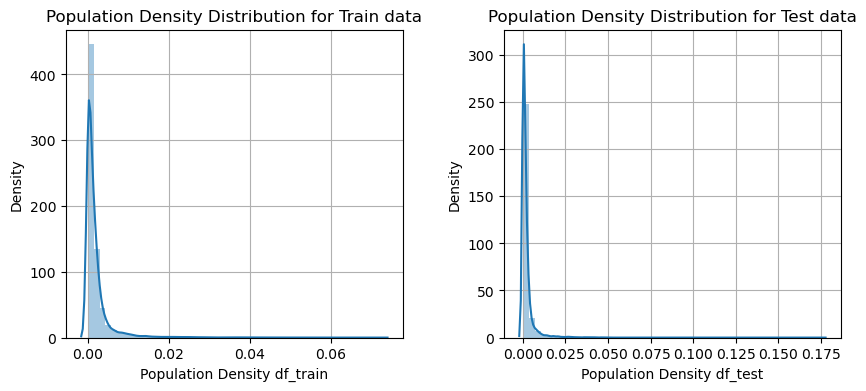

In [46]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df_train['pop_density'])
plt.title("Population Density Distribution for Train data")
plt.xlabel("Population Density df_train")
plt.grid()
plt.subplot(1,2,2)
sns.distplot(df_test['pop_density'])
plt.title("Population Density Distribution for Test data")
plt.xlabel("Population Density df_test")
plt.grid()
plt.subplots_adjust(wspace= 0.30)
plt.show()

#### b) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

In [47]:
df_train['Median_age'] = (df_train['male_age_median'] * df_train['male_pop'] +
                        df_train['female_age_median'] * df_train['female_pop'])/df_train['pop']
df_train[['pop', 'Median_age']].head()

pop  Median_age
UID                     
267822  5230   44.667430
246444  2633   34.722748
245683  6881   41.774472
279653  2700   49.879012
247218  5637   21.965629

In [48]:
df_test['Median_age'] = (df_test['male_age_median'] * df_test['male_pop'] +
                        df_test['female_age_median'] * df_test['female_pop'])/df_test['pop']
df_test[['pop', 'Median_age']].head()

pop  Median_age
UID                     
255504  3417   31.189053
252676  3796   46.382991
276314  3944   43.147420
248614  2508   45.155104
286865  6230   43.235983

#### c) Visualize the findings using appropriate chart type

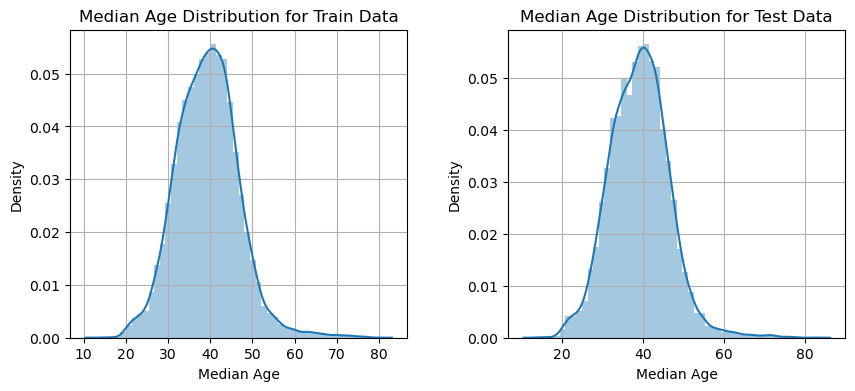

In [49]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df_train['Median_age'])
plt.title("Median Age Distribution for Train Data")
plt.xlabel("Median Age")
plt.grid()
plt.subplot(1,2,2)
sns.distplot(df_test['Median_age'])
plt.title("Median Age Distribution for Test Data")
plt.xlabel("Median Age")
plt.grid()
plt.subplots_adjust(wspace= 0.30)
plt.show()

- Age ranges from 18 years to 75 years.

- The majority belongs to 40 years.

- Little right skewness is observed.

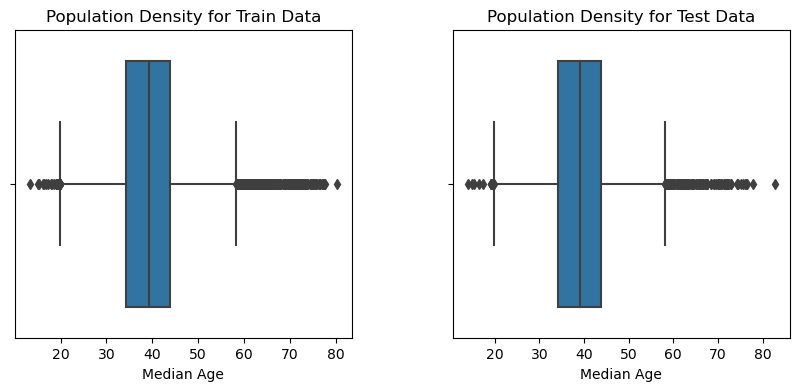

In [50]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df_train['Median_age'])
plt.title("Population Density for Train Data")
plt.xlabel("Median Age")
plt.subplot(1,2,2)
sns.boxplot(df_test['Median_age'])
plt.title("Population Density for Test Data")
plt.xlabel("Median Age")
plt.subplots_adjust(wspace= 0.30)
plt.show()

### 2. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

In [51]:
df_train['pop'].describe()

count    26585.000000
mean      4367.763438
std       2093.787018
min         63.000000
25%       2938.000000
50%       4078.000000
75%       5456.000000
max      53812.000000
Name: pop, dtype: float64

In [52]:
df_train['pop_bins'] = pd.cut(df_train['pop'], bins = 5, labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [53]:
df_test['pop_bins'] = pd.cut(df_test['pop'], bins = 5, labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [54]:
df_train[['pop', 'pop_bins']]

pop  pop_bins
UID                    
267822   5230  Very Low
246444   2633  Very Low
245683   6881  Very Low
279653   2700  Very Low
247218   5637  Very Low
...       ...       ...
279212   1847  Very Low
277856   4155  Very Low
233000   2829  Very Low
287425  11542       Low
265371   3726  Very Low

[26585 rows x 2 columns]

In [55]:
df_test[['pop', 'pop_bins']]

pop  pop_bins
UID                   
255504  3417  Very Low
252676  3796  Very Low
276314  3944  Very Low
248614  2508  Very Low
286865  6230       Low
...      ...       ...
238088  5611  Very Low
242811  2695  Very Low
250127  7392       Low
241096  5945       Low
287763  4117  Very Low

[11355 rows x 2 columns]

In [56]:
df_train.pop_bins.value_counts()

Very Low     26334
Low            238
Medium           9
High             3
Very High        1
Name: pop_bins, dtype: int64

In [57]:
df_test.pop_bins.value_counts()

Very Low     8977
Low          2306
Medium         58
High           11
Very High       3
Name: pop_bins, dtype: int64

#### a) Analyze the married, separated, and divorced population for these population brackets

In [58]:
df_train.groupby(by = 'pop_bins')[['married', 'separated', 'divorced']].count()

married  separated  divorced
pop_bins                               
Very Low     26334      26334     26334
Low            238        238       238
Medium           9          9         9
High             3          3         3
Very High        1          1         1

In [59]:
df_train.groupby(by = 'pop_bins')[['married', 'separated', 'divorced']].agg(['mean', 'median'])

married           separated           divorced          
               mean    median      mean   median      mean    median
pop_bins                                                            
Very Low   0.511869  0.528105  0.019017  0.01351  0.101048  0.096090
Low        0.584691  0.592575  0.015655  0.01106  0.075749  0.070565
Medium     0.655737  0.618710  0.005003  0.00412  0.065927  0.064890
High       0.726957  0.736060  0.015663  0.00916  0.077310  0.063050
Very High  0.734740  0.734740  0.004050  0.00405  0.030360  0.030360

- In the Very Low population group, there are more divorced people as compared to the rest of the population category.
- Very High population group has highest number of married people, lowest number of separated as well as lowest number of divorced people as compared to the rest of the population category.

#### b) Visualize using appropriate chart type

In [60]:
pop_bin_mean = df_train.groupby(by = 'pop_bins')[['married', 'separated', 'divorced']].agg(['mean'])
pop_bin_median = df_train.groupby(by = 'pop_bins')[['married', 'separated', 'divorced']].agg(['median'])

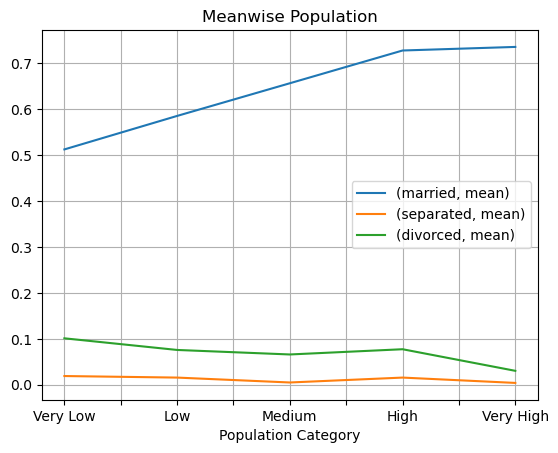

In [61]:
pop_bin_mean.plot(title = "Meanwise Population")
plt.xlabel("Population Category")
plt.legend(loc = "best")
plt.grid()
plt.show()

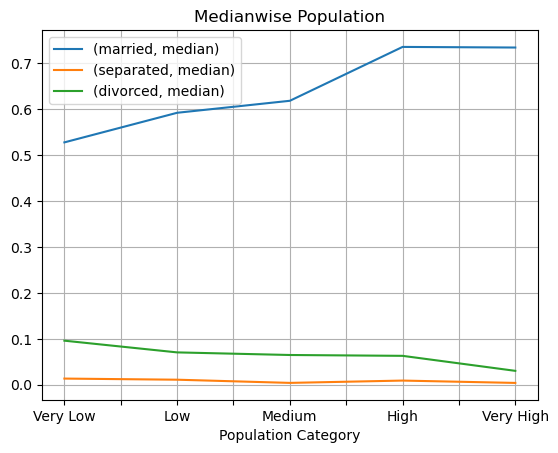

In [62]:
pop_bin_median.plot(title = "Medianwise Population")
plt.xlabel("Population Category")
plt.legend(loc = "best")
plt.grid()
plt.show()

### 3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [63]:
df_train[['state','rent_mean', 'rent_median']]

state   rent_mean  rent_median
UID                                          
267822      New York   769.38638        784.0
246444       Indiana   804.87924        848.0
245683       Indiana   742.77365        703.0
279653   Puerto Rico   803.42018        782.0
247218        Kansas   938.56493        881.0
...              ...         ...          ...
279212   Puerto Rico   439.42839        419.0
277856  Pennsylvania  1813.19253       1788.0
233000      Colorado   849.39107        834.0
287425         Texas  1972.45746       1843.0
265371        Nevada   949.84199        924.0

[26585 rows x 3 columns]

In [64]:
rent_state = df_train.groupby(by = 'state')['rent_mean'].mean()
rent_state.head()

state
Alabama        768.810406
Alaska        1173.830410
Arizona       1101.133798
Arkansas       715.367386
California    1479.363998
Name: rent_mean, dtype: float64

In [65]:
income_state = df_train.groupby(by = 'state')['family_mean'].mean()
income_state.head()

state
Alabama       66814.665178
Alaska        92504.826703
Arizona       73546.551858
Arkansas      64046.416919
California    88438.468548
Name: family_mean, dtype: float64

In [66]:
overall_percentage = rent_state/income_state
overall_percentage.head()

state
Alabama       0.011507
Alaska        0.012689
Arizona       0.014972
Arkansas      0.011170
California    0.016728
dtype: float64

In [67]:
# Overall percentage
(df_train['rent_mean'].sum()/df_train['family_mean'].sum())*100

1.329892795119824

### 4. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

In [68]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_

In [69]:
cols_heatmap = df_train[['COUNTYID', 'STATEID', 'state', 'city', 'type', 'zip_code', 'pop', 'male_pop', 'female_pop', 
                        'rent_mean', 'hi_mean', 'family_mean', 'second_mortgage', 'home_equity', 'debt','hs_degree',
                        'male_age_mean', 'female_age_mean', 'pct_own', 'married', 'separated', 'divorced',]].corr()

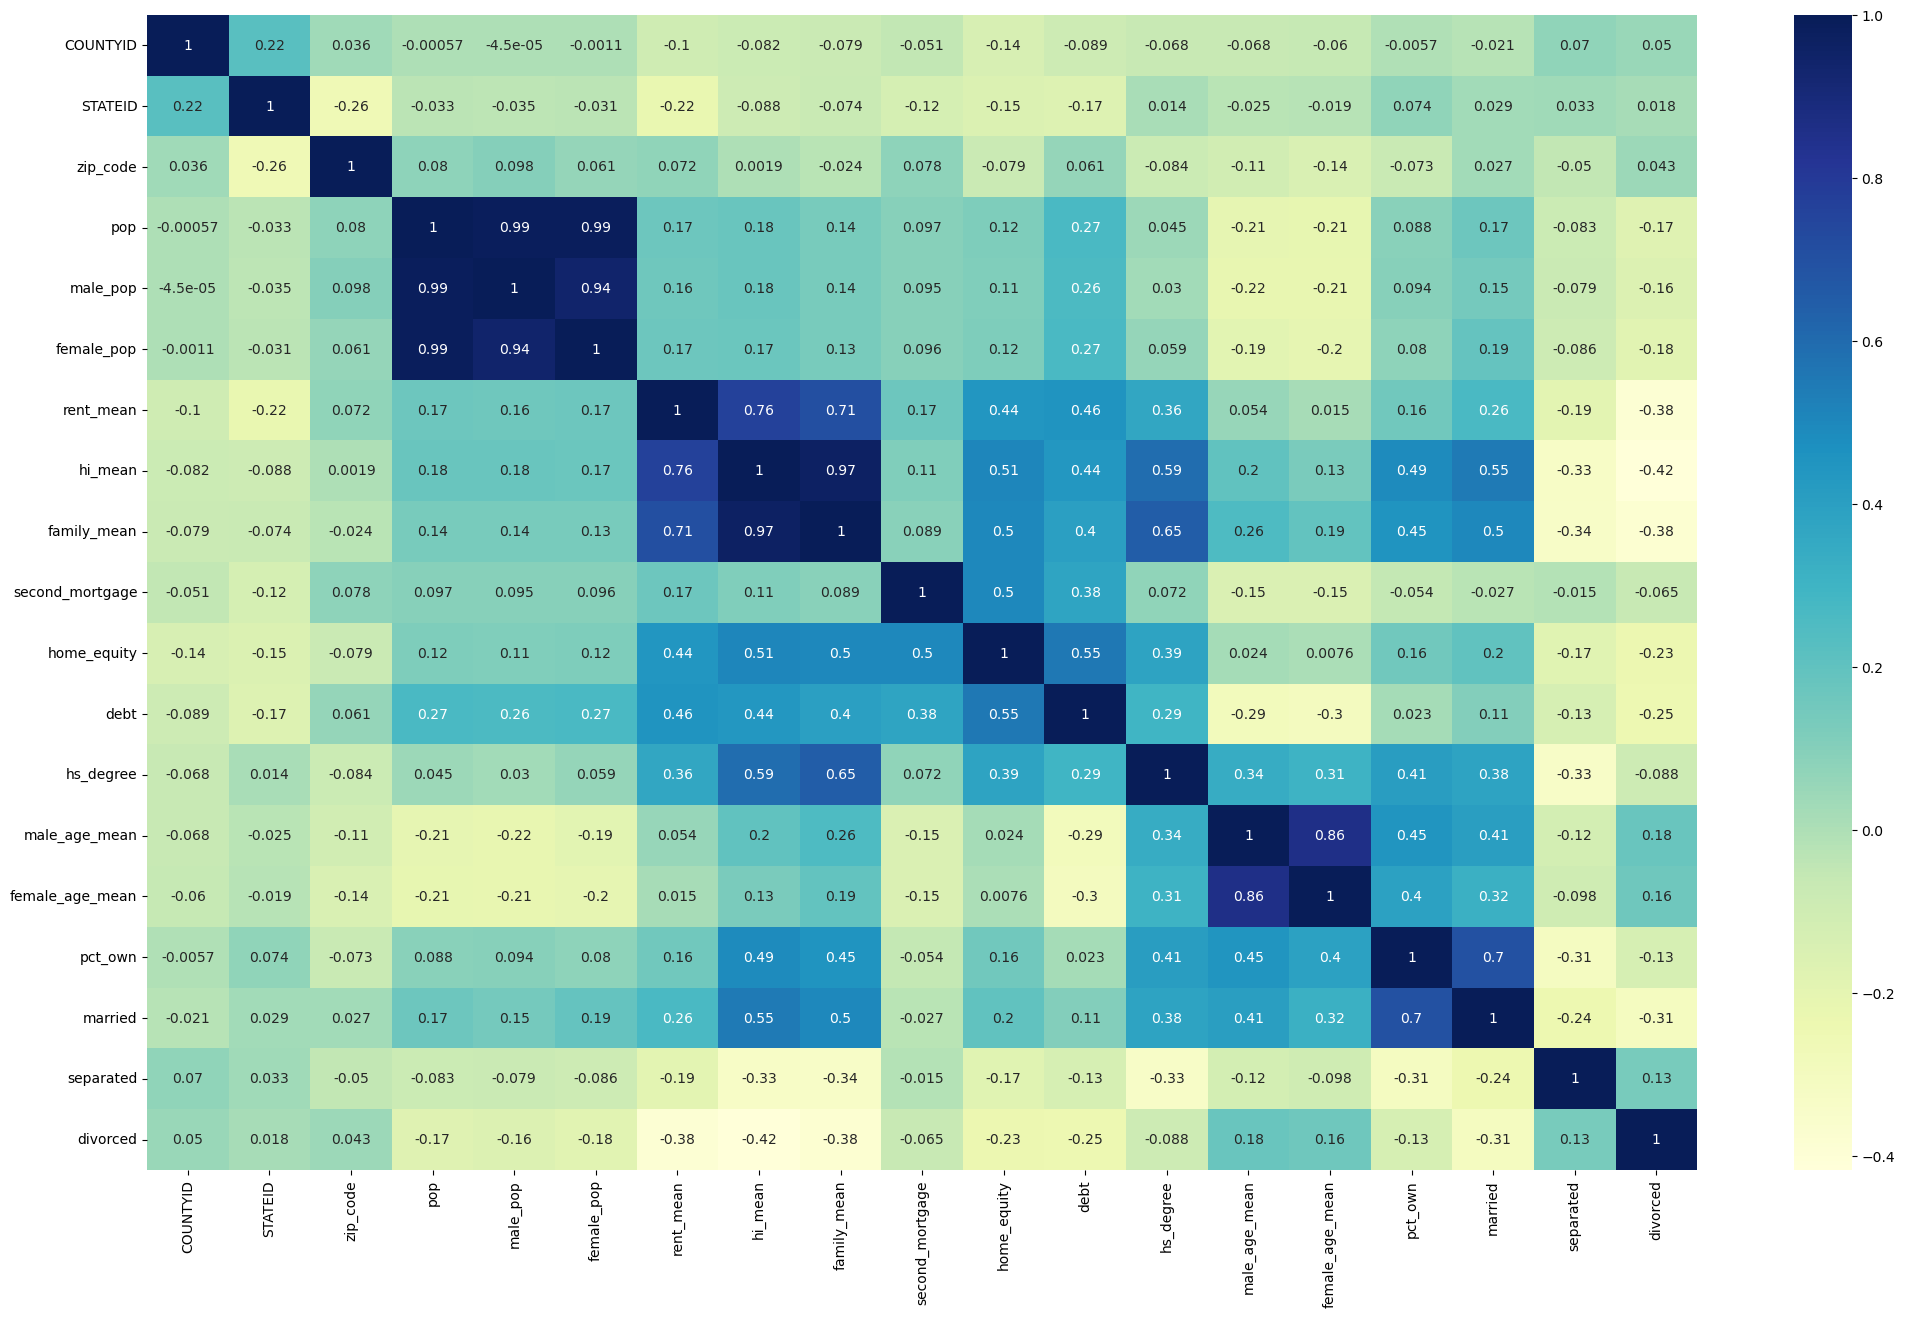

In [70]:
plt.figure(figsize=(25,15))
sns.heatmap(cols_heatmap, annot=True, cmap='YlGnBu')
plt.show()

- Very High Positive Correlation is observed between 
    - male_pop, female_pop & pop
    - family_mean & hi_mean
    - family_age_mean & male_age_mean
    
- High Positive Correlation is observed between
    - hi_mean & rent_mean
    - family_mean & rent_mean
    - hs_degree & family_mean
    - married & pct_own

# Project Task: Week 3
### Data Pre-processing:

### 1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 
### 2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent      random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain          insight into the linear relationships in the data. Following are the list of latent variables:
    • Highschool graduation rates
    • Median population age
    • Second mortgage statistics
    • Percent own
    • Bad debt expense

In [71]:
from factor_analyzer import FactorAnalyzer

In [72]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_

In [73]:
fa_df_train = df_train.select_dtypes(exclude=('category', 'object'))

In [74]:
fa_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26585 entries, 267822 to 265371
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COUNTYID                     26585 non-null  int64  
 1   STATEID                      26585 non-null  int64  
 2   zip_code                     26585 non-null  int64  
 3   area_code                    26585 non-null  int64  
 4   lat                          26585 non-null  float64
 5   lng                          26585 non-null  float64
 6   ALand                        26585 non-null  float64
 7   AWater                       26585 non-null  int64  
 8   pop                          26585 non-null  int64  
 9   male_pop                     26585 non-null  int64  
 10  female_pop                   26585 non-null  int64  
 11  rent_mean                    26585 non-null  float64
 12  rent_median                  26585 non-null  float64
 13  rent_stdev

In [75]:
#Creating FactorAnalyzer object and performing factor analysis
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit_transform(fa_df_train)
loadings = fa.loadings_

#Checking Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([ 1.64501148e+01,  1.24030533e+01,  8.97275988e+00,  4.82727495e+00,
        4.41962370e+00,  3.38627145e+00,  2.37428417e+00,  2.13727698e+00,
        1.55751411e+00,  1.36381406e+00,  1.35566796e+00,  1.24811683e+00,
        1.14947852e+00,  1.05550496e+00,  1.00038367e+00,  9.07628682e-01,
        8.94817155e-01,  8.14675358e-01,  7.65526716e-01,  6.77394083e-01,
        6.05864840e-01,  5.87074096e-01,  5.80551737e-01,  5.56982551e-01,
        5.02233653e-01,  4.41424562e-01,  4.32444174e-01,  3.80558847e-01,
        3.47430797e-01,  3.13759836e-01,  3.07917477e-01,  2.96755983e-01,
        2.48148044e-01,  2.41685681e-01,  2.31477964e-01,  2.04300234e-01,
        1.97722934e-01,  1.76401829e-01,  1.60281026e-01,  1.51455296e-01,
        1.39304980e-01,  1.32498515e-01,  1.14040925e-01,  1.07609203e-01,
        1.03411124e-01,  9.13602308e-02,  9.06169709e-02,  7.99567607e-02,
        6.03726669e-02,  5.82364639e-02,  5.27144553e-02,  3.38775446e-02,
        3.17521110e-02,  

In [76]:
print("Sorted:",sorted(ev, reverse=True))
print("\nSize:",ev.size)
print("\nSize:",fa_df_train.shape[1])

Sorted: [16.450114838545417, 12.40305327737094, 8.97275987782638, 4.827274951210276, 4.419623696403794, 3.3862714520271235, 2.374284165973279, 2.1372769776442353, 1.5575141141043185, 1.3638140600039537, 1.3556679565518985, 1.2481168257496817, 1.1494785225148565, 1.0555049624856776, 1.000383669709866, 0.9076286824534584, 0.8948171548744023, 0.8146753582956832, 0.7655267160358757, 0.677394083326619, 0.6058648396198004, 0.5870740961474066, 0.5805517365962005, 0.5569825511053841, 0.5022336533490541, 0.4414245620008767, 0.43244417359095744, 0.3805588472113495, 0.34743079715819264, 0.31375983577529487, 0.3079174765280145, 0.2967559828340237, 0.2481480441346208, 0.24168568055860046, 0.23147796370530083, 0.20430023400679853, 0.19772293437052163, 0.1764018288102684, 0.16028102638291536, 0.15145529649502545, 0.13930498047410328, 0.13249851450801228, 0.11404092486141937, 0.1076092025309672, 0.10341112380139938, 0.09136023075056879, 0.09061697093655742, 0.0799567606555546, 0.060372666910959064, 0.

In [77]:
xval = range(1, fa_df_train.shape[1]+1)

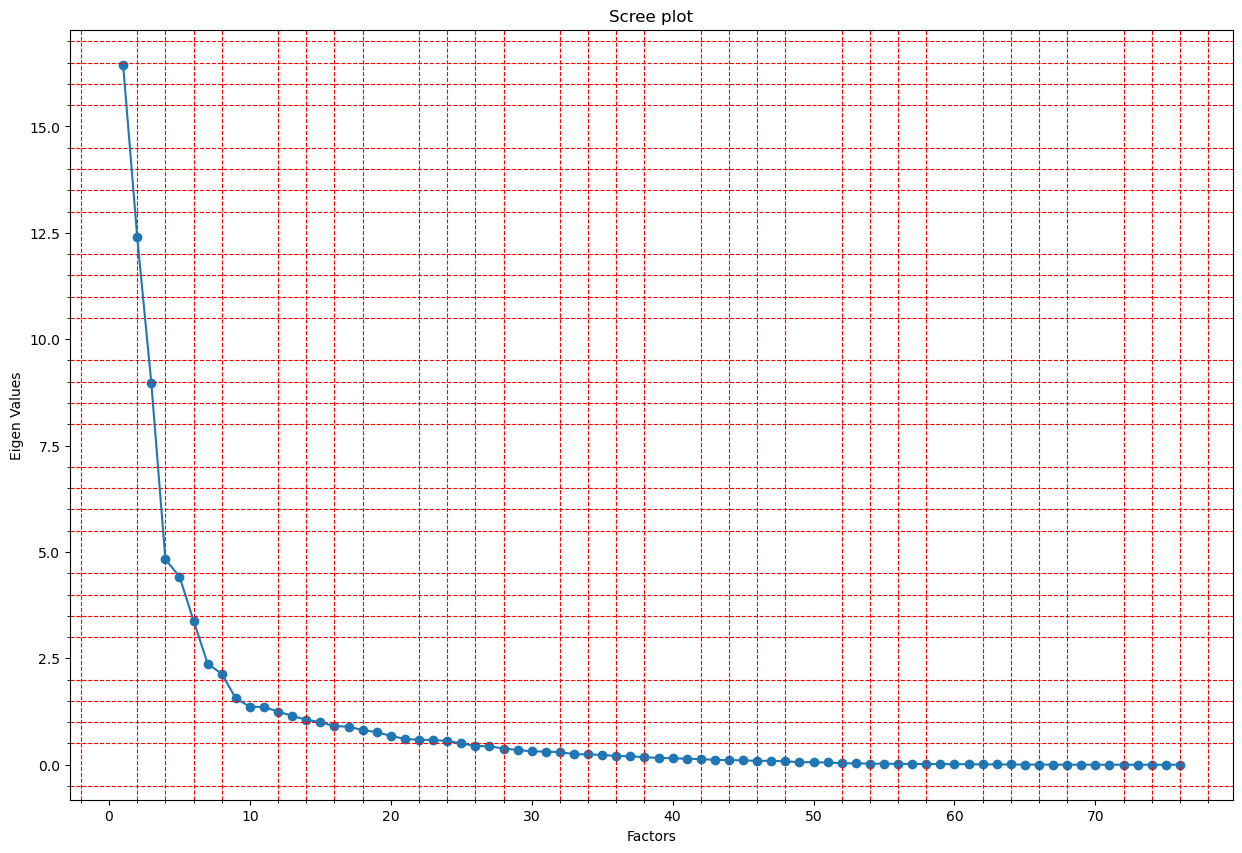

In [78]:
plt.figure(figsize=(15,10))
plt.title("Scree plot")
plt.xlabel("Factors")
plt.ylabel("Eigen Values")
plt.scatter(xval, ev)
plt.plot(xval, ev)
plt.grid(b=True, which='minor', color='r', linestyle='--')
plt.minorticks_on()
plt.show()

In [79]:
df_Factors  = pd.DataFrame.from_records(loadings)

df_Factors = df_Factors.add_prefix('Factor ')

df_Factors.index = fa_df_train.columns
df_Factors

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
COUNTYID        -0.121467  0.023864  0.064159 -0.049338  0.043508 -0.072132   
STATEID         -0.116626 -0.025949  0.174363 -0.084042  0.098171  0.007296   
zip_code        -0.041975  0.108943 -0.068539 -0.144379 -0.033195 -0.202175   
area_code        0.014956  0.020605 -0.011753  0.024296 -0.005710 -0.084730   
lat              0.189045 -0.105997 -0.067375 -0.175523 -0.049946  0.186421   
...                   ...       ...       ...       ...       ...       ...   
BAD_DEBT         0.650683  0.029018 -0.323422 -0.111934 -0.461837  0.303323   
GOOD_DEBT       -0.650683 -0.029018  0.323422  0.111934  0.461837 -0.303323   
Remaning_income  0.353804 -0.157782  0.001032  0.159686  0.306825  0.286105   
pop_density     -0.009890  0.084188 -0.413661  0.098072  0.328215  0.082651   
Median_age       0.320412 -0.377575  0.616295  0.401649 -0.046410  0.313298   

                 Factor 6  Factor 7  Factor 8  Factor 9  ...  Factor 15  \
COUNTYID        -0.064150 -0.000500  0.019670  0.083287  ...  -0.041960   
STATEID         -0.386308 -0.106417  0.052836  0.008942  ...   0.140697   
zip_code         0.749217  0.441724  0.114256 -0.109741  ...   0.181417   
area_code        0.015043 -0.055767 -0.037316  0.035503  ...  -0.009654   
lat             -0.188249  0.083182  0.126231 -0.245474  ...   0.238567   
...                   ...       ...       ...       ...  ...        ...   
BAD_DEBT        -0.002725 -0.166413  0.066974 -0.127652  ...   0.040025   
GOOD_DEBT        0.002725  0.166413 -0.066974  0.127652  ...  -0.040025   
Remaning_income -0.112850  0.184142  0.283166  0.064099  ...  -0.210747   
pop_density      0.008607 -0.192113 -0.067117  0.021249  ...  -0.042315   
Median_age       0.185335 -0.067104 -0.180255  0.069782  ...   0.004953   

                 Factor 16  Factor 17  Factor 18  Factor 19  Factor 20  \
COUNTYID          0.237126   0.151688  -0.197139  -0.000667   0.113793   
STATEID           0.340829   0.233849   0.010258  -0.177382   0.240414   
zip_code          0.078956   0.081575  -0.034605   0.021122   0.033343   
area_code         0.118584  -0.019325  -0.152830   0.018907   0.027246   
lat              -0.087495   0.082765   0.320606  -0.102860   0.058908   
...                    ...        ...        ...        ...        ...   
BAD_DEBT          0.044881   0.032336  -0.027168   0.007939   0.006608   
GOOD_DEBT        -0.044881  -0.032336   0.027168  -0.007939  -0.006608   
Remaning_income  -0.097058   0.171299   0.138789   0.039205  -0.041660   
pop_density       0.014578  -0.069988   0.208845  -0.090983   0.095717   
Median_age        0.052826   0.036477  -0.019822  -0.056202  -0.033265   

                 Factor 21  Factor 22  Factor 23  Factor 24  
COUNTYID          0.014696  -0.032228  -0.002881  -0.051202  
STATEID          -0.012446   0.017144   0.062561   0.005830  
zip_code          0.019216  -0.033320  -0.012086  -0.032751  
area_code         0.021172  -0.104422   0.030017   0.023820  
lat              -0.027426   0.115366  -0.032182  -0.041206  
...                    ...        ...        ...        ...  
BAD_DEBT         -0.000449  -0.013841   0.011085  -0.009847  
GOOD_DEBT         0.000449   0.013841  -0.011085   0.009847  
Remaning_income   0.038794  -0.191160   0.137990  -0.041331  
pop_density       0.000737  -0.034535   0.070680  -0.015750  
Median_age        0.004536   0.010470   0.001083   0.007560  

[76 rows x 25 columns]

In [80]:
fa = FactorAnalyzer(n_factors=12 ,rotation="varimax")
fa.fit(fa_df_train)
new_load = fa.loadings_

In [81]:
New_Factors = pd.DataFrame.from_records(new_load)
New_Factors = New_Factors.add_prefix("Factor ")
New_Factors.index = fa_df_train.columns
New_Factors

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
COUNTYID        -0.094306  0.016231 -0.067259 -0.026929 -0.032105 -0.004703   
STATEID         -0.115687 -0.002394 -0.065692 -0.032880 -0.094090  0.082233   
zip_code        -0.044881  0.049550 -0.105693  0.014041 -0.034214  0.003868   
area_code        0.041746  0.030346 -0.017843 -0.054318 -0.004943 -0.075285   
lat              0.079279 -0.110047 -0.077106  0.051019 -0.074011  0.251972   
...                   ...       ...       ...       ...       ...       ...   
BAD_DEBT         0.361262  0.045864 -0.017889 -0.041039 -0.026821  0.153037   
GOOD_DEBT       -0.361262 -0.045864  0.017889  0.041039  0.026821 -0.153037   
Remaning_income  0.371282 -0.101728  0.158945  0.193463  0.025081  0.355310   
pop_density      0.255545 -0.060181 -0.114827  0.393536  0.084184 -0.271423   
Median_age       0.133890 -0.072269  0.946916 -0.202673 -0.070110  0.111837   

                 Factor 6  Factor 7  Factor 8  Factor 9  Factor 10  Factor 11  
COUNTYID        -0.143706 -0.002368  0.048996 -0.008294  -0.049634  -0.002689  
STATEID         -0.147470 -0.057465  0.335893 -0.047756  -0.088017   0.082364  
zip_code        -0.069760  0.050855 -0.894686 -0.026567   0.012577   0.016383  
area_code       -0.030787  0.009855  0.004289  0.050287  -0.001366  -0.013896  
lat              0.181171  0.046492  0.093402 -0.086824   0.079223   0.107068  
...                   ...       ...       ...       ...        ...        ...  
BAD_DEBT         0.846767  0.311941  0.026378  0.066470   0.070511  -0.022657  
GOOD_DEBT       -0.846767 -0.311941 -0.026378 -0.066470  -0.070511   0.022657  
Remaning_income  0.014490 -0.055318  0.059092 -0.085131  -0.216458   0.000194  
pop_density     -0.038532 -0.021890  0.105213  0.027958   0.061886  -0.111191  
Median_age       0.026530 -0.036789  0.032941 -0.038426  -0.024761   0.113658  

[76 rows x 12 columns]

In [82]:
New_Factors.columns

Index(['Factor 0', 'Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5',
       'Factor 6', 'Factor 7', 'Factor 8', 'Factor 9', 'Factor 10',
       'Factor 11'],
      dtype='object')

In [83]:
New_Factors_df = round(New_Factors.loc[['hs_degree', 'hs_degree_male', 'hs_degree_female',"male_age_median", "female_age_median", 
                                "home_equity_second_mortgage", 'second_mortgage','second_mortgage_cdf','pct_own','BAD_DEBT']])

In [84]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < -0.6:
    color = 'red'
  elif value > 0.6:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color

In [85]:
New_Factors_df.style.applymap(color_negative_red)

#### We can see that 'Related parameters' are loading on Unique Factors

In [86]:
len(fa_df_train.columns)

76

In [87]:
#Fetching the variance
fact_var = fa.get_factor_variance()
fact_var

(array([12.32196237, 11.91316203,  5.58056077,  5.49365386,  4.74170788,
         3.78490369,  3.73084787,  2.75661873,  2.16353751,  1.90916053,
         1.76345868,  1.54623546]),
 array([0.16213108, 0.15675213, 0.07342843, 0.07228492, 0.06239089,
        0.04980136, 0.0490901 , 0.0362713 , 0.0284676 , 0.02512053,
        0.0232034 , 0.0203452 ]),
 array([0.16213108, 0.31888322, 0.39231165, 0.46459657, 0.52698746,
        0.57678882, 0.62587893, 0.66215023, 0.69061783, 0.71573836,
        0.73894176, 0.75928697]))

In [88]:
Factor_variance = pd.DataFrame.from_records(fact_var)
Factor_variance = Factor_variance.add_prefix("Factor ")
Factor_variance

Factor 0   Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  Factor 6  \
0  12.321962  11.913162  5.580561  5.493654  4.741708  3.784904  3.730848   
1   0.162131   0.156752  0.073428  0.072285  0.062391  0.049801  0.049090   
2   0.162131   0.318883  0.392312  0.464597  0.526987  0.576789  0.625879   

   Factor 7  Factor 8  Factor 9  Factor 10  Factor 11  
0  2.756619  2.163538  1.909161   1.763459   1.546235  
1  0.036271  0.028468  0.025121   0.023203   0.020345  
2  0.662150  0.690618  0.715738   0.738942   0.759287

In [89]:
Factor_variance.index = ['Loadings', 'Proportion Var', 'Cummulative Var']
round(Factor_variance,2)

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
Loadings            12.32     11.91      5.58      5.49      4.74      3.78   
Proportion Var       0.16      0.16      0.07      0.07      0.06      0.05   
Cummulative Var      0.16      0.32      0.39      0.46      0.53      0.58   

                 Factor 6  Factor 7  Factor 8  Factor 9  Factor 10  Factor 11  
Loadings             3.73      2.76      2.16      1.91       1.76       1.55  
Proportion Var       0.05      0.04      0.03      0.03       0.02       0.02  
Cummulative Var      0.63      0.66      0.69      0.72       0.74       0.76

# Project Task: Week 4
### Data Modeling :

1. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly     mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.

    a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

    b) Run another model at State level. There are 52 states in USA.

    c) Keep below considerations while building a linear regression model. Data Modeling :

        • Variables should have significant impact on predicting Monthly mortgage and owner costs

        • Utilize all predictor variable to start with initial hypothesis

        • R square of 60 percent and above should be achieved

        • Ensure Multi-collinearity does not exist in dependent variables

        • Test if predicted variable is normally distributed

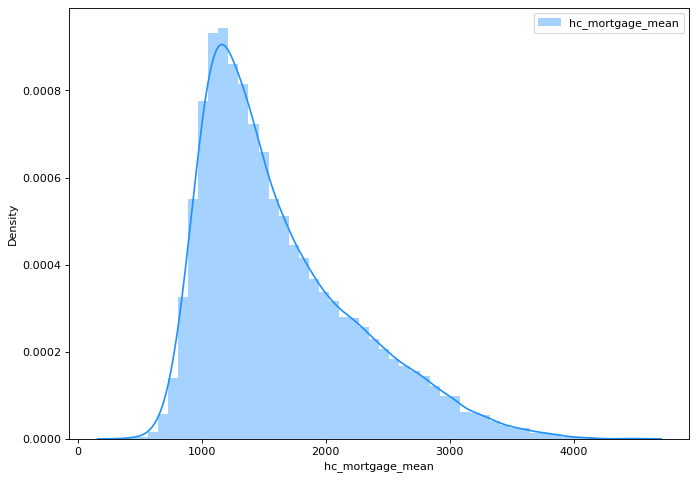

In [90]:
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df_train.hc_mortgage_mean, color="dodgerblue", label="hc_mortgage_mean")
plt.legend();
plt.show()

Target variable has a positive skewness

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

In [92]:
print(df_train.shape)
print(df_test.shape)

(26585, 84)
(11355, 79)


In [93]:
test_list = df_test.columns
lis = []
for col in df_train:
    if col not in test_list:
        lis.append(col)
lis

['BAD_DEBT', 'BINS_OD', 'BINS_BD', 'GOOD_DEBT', 'Remaning_income']

In [94]:
print(df_train.shape)
df_train.drop(columns=['BAD_DEBT', 'BINS_OD', 'BINS_BD', 'GOOD_DEBT', 'Remaning_income'], inplace = True)
print(df_train.shape)

(26585, 84)
(26585, 79)


In [95]:
print(df_train.shape)
print(df_test.shape)

(26585, 79)
(11355, 79)


In [96]:
df_train[['hc_mortgage_mean']]

hc_mortgage_mean
UID                     
267822        1414.80295
246444         864.41390
245683        1506.06758
279653        1175.28642
247218        1192.58759
...                  ...
279212         770.11560
277856        2210.84055
233000        1671.07908
287425        3074.83088
265371        1455.42340

[26585 rows x 1 columns]

In [97]:
df_train.dropna(axis = 0, inplace=True)
df_test.dropna(axis = 0, inplace=True)

In [98]:
print(df_train.shape)
print(df_test.shape)

(26585, 79)
(11355, 79)


In [99]:
feature_cols=['COUNTYID','STATEID','zip_code','pop', 'family_mean', 'second_mortgage', 'home_equity', 'debt','hs_degree',
              'Median_age','pct_own', 'married','separated', 'divorced']

In [100]:
week4_bck_train = df_train.copy()
week4_bck_test = df_test.copy()

In [101]:
x_train = df_train[feature_cols]
y_train = df_train['hc_mortgage_mean']
x_test = df_test[feature_cols]
y_test = df_test['hc_mortgage_mean']

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
x_train.describe()

COUNTYID       STATEID      zip_code           pop   family_mean  \
count  26585.000000  26585.000000  26585.000000  26585.000000   26585.00000   
mean      85.580440     28.256348  50134.895091   4367.763438   79282.24354   
std       97.891735     16.370924  29492.900596   2093.787018   31125.02069   
min        1.000000      1.000000    602.000000     63.000000   10706.26180   
25%       29.000000     13.000000  27106.000000   2938.000000   57217.14016   
50%       63.000000     27.000000  47905.000000   4078.000000   73119.26510   
75%      109.000000     42.000000  77084.000000   5456.000000   96218.70699   
max      840.000000     72.000000  99925.000000  53812.000000  208969.99390   

       second_mortgage   home_equity          debt     hs_degree  \
count     26585.000000  26585.000000  26585.000000  26585.000000   
mean          0.029876      0.100928      0.629911      0.859577   
std           0.030664      0.065590      0.148977      0.110139   
min           0.000000      0.000000      0.013590      0.186520   
25%           0.008060      0.050450      0.539480      0.809700   
50%           0.022730      0.094900      0.648080      0.889340   
75%           0.042900      0.143680      0.736190      0.939040   
max           0.608700      0.687500      0.978260      1.000000   

         Median_age       pct_own       married     separated      divorced  
count  26585.000000  26585.000000  26585.000000  26585.000000  26585.000000  
mean      39.389352      0.649487      0.512602      0.018981      0.100805  
std        7.432987      0.214469      0.130688      0.020049      0.047694  
min       13.378362      0.003530      0.005700      0.000000      0.000000  
25%       34.335382      0.513290      0.430820      0.004660      0.066760  
50%       39.310453      0.695110      0.528840      0.013480      0.095670  
75%       43.937604      0.818470      0.606840      0.027360      0.129100  
max       80.166670      0.998560      1.000000      0.275000      0.484850

In [104]:
y_train.describe()

count    26585.000000
mean      1627.898787
std        620.559056
min        402.681840
25%       1158.136460
50%       1459.286080
75%       1979.249110
max       4462.342290
Name: hc_mortgage_mean, dtype: float64

In [105]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled =sc.fit_transform(x_test)

In [106]:
x_train_scaled

array([[-0.33282741,  0.47302145, -1.24740484, ...,  0.5043254 ,
        -0.32824767, -0.27477163],
       [ 0.56614179, -0.62650957, -0.11931554, ..., -1.25295184,
        -0.23547174, -0.22025652],
       [-0.23067182, -0.62650957, -0.13606565, ...,  1.03185291,
        -0.14518977,  0.12088226],
       ...,
       [ 0.0145016 , -1.23736014,  1.03478052, ...,  1.46847489,
        -0.68738034, -0.49660619],
       [ 3.6103784 ,  1.20604213,  0.87816361, ...,  1.85505293,
        -0.49035617, -1.01051593],
       [-0.84360537,  0.22868122,  1.32197368, ..., -1.28815095,
         0.55212616,  0.67924277]])

In [107]:
x_test_scaled

array([[ 0.77154843, -0.14787648, -0.06699701, ..., -1.71167277,
         0.94978465,  0.90847794],
       [-0.85528175, -0.32862972, -1.55088833, ...,  0.99225534,
        -0.95828531,  0.71431416],
       [-0.71469149,  0.81614082, -1.19158503, ...,  0.67232607,
        -0.27872617,  0.0086278 ],
       ...,
       [-0.77494446, -0.20812756, -1.63072977, ..., -0.05555059,
        -0.90424084, -0.56670348],
       [-0.59418555, -0.56963404,  0.03957057, ...,  1.17835505,
        -0.95828531, -1.11423691],
       [ 3.6837753 ,  1.17764731,  0.96113419, ...,  0.06859098,
         0.30275228,  0.12655808]])

#### Running a model at Nation Level.

In [108]:
lr = LinearRegression()

In [109]:
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [110]:
y_pred = lr.predict(x_test_scaled)

In [111]:
print("Overall R2 Score", r2_score(y_test, y_pred))
print("Overall RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Overall R2 Score 0.7513061476377627
Overall RMSE 314.79945199484854


R2 Score is 75% and RMSE is 314 which is good but we will still proceed with running the model at State Level

#### Running a model at state level

In [112]:
uni_state = df_train.STATEID.unique()
uni_state[:10:2]

array([36, 72,  1, 45,  5], dtype=int64)

In [113]:
for i in [20, 1, 45]:
    print("*"*90)
    print("STATEID :", i)
    
    x_train_state = df_train[df_train.STATEID == i][feature_cols]
    y_train_state = df_train[df_train.STATEID == i]['hc_mortgage_mean']
    
    x_test_state = df_test[df_test.STATEID == i][feature_cols]
    y_test_state = df_test[df_test.STATEID == i]['hc_mortgage_mean']
    
    x_train_state_scaled = sc.fit_transform(x_train_state)
    x_test_state_scaled = sc.fit_transform(x_test_state)
    
    lr = LinearRegression()
    
    lr.fit(x_train_state_scaled, y_train_state)
    y_pred_state = lr.predict(x_test_state_scaled)
    
    print("Overall R2 Score for",i , ":", r2_score(y_test_state, y_pred_state))
    print("Overall RMSE for",i , ":", np.sqrt(mean_squared_error(y_test_state, y_pred_state)))
    

******************************************************************************************
STATEID : 20
Overall R2 Score for 20 : 0.8801114508360377
Overall RMSE for 20 : 143.41926392999306
******************************************************************************************
STATEID : 1
Overall R2 Score for 1 : 0.6729192403324948
Overall RMSE for 1 : 174.81015560089193
******************************************************************************************
STATEID : 45
Overall R2 Score for 45 : 0.7068418321829575
Overall RMSE for 45 : 181.52977719088605


Checking the Residuals

In [114]:
residuals = y_test - y_pred
residuals

UID
255504    251.488994
252676     -7.849712
276314    107.468817
248614   -107.329935
286865    -54.941582
             ...    
238088    -19.295706
242811   -163.964752
250127    -69.465187
241096   -274.083718
287763    222.932771
Name: hc_mortgage_mean, Length: 11355, dtype: float64

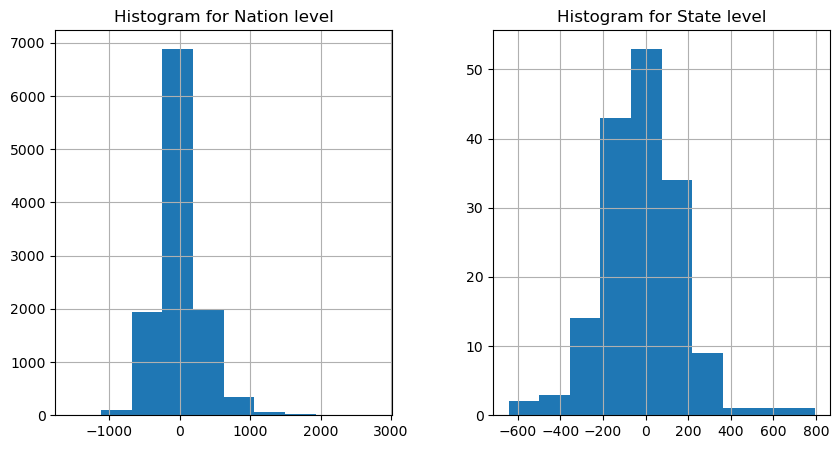

In [115]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.30)
plt.subplot(1,2,1)
plt.hist(residuals)
plt.grid()
plt.title("Histogram for Nation level")
plt.subplot(1,2,2)
plt.hist(y_test_state - y_pred_state)
plt.title("Histogram for State level")
plt.grid()
plt.show()

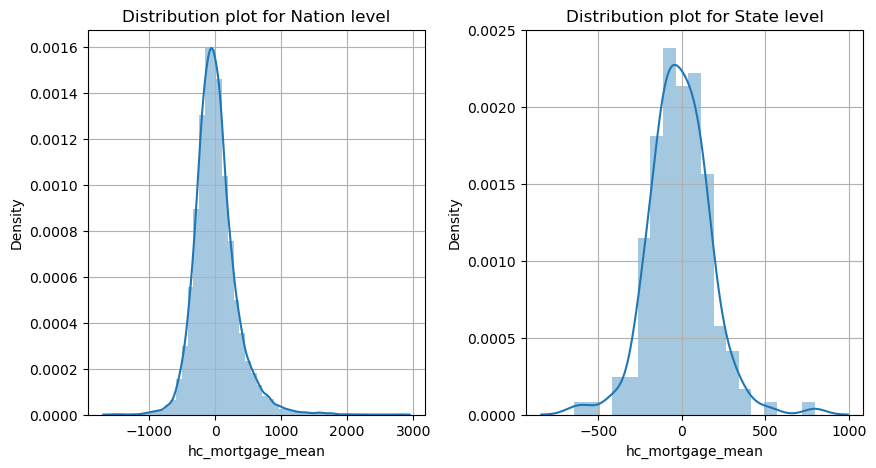

In [116]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.30)
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.grid()
plt.title("Distribution plot for Nation level")
plt.subplot(1,2,2)
sns.distplot(y_test_state - y_pred_state)
plt.title("Distribution plot for State level")
plt.grid()
plt.show()

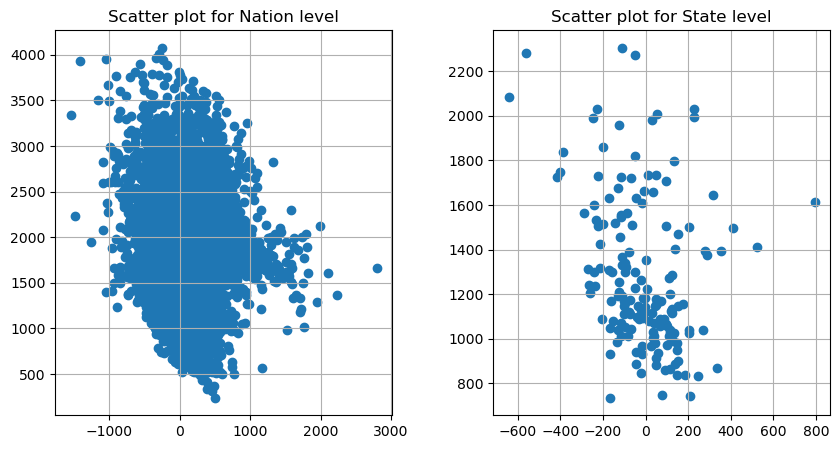

In [117]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.30)
plt.subplot(1,2,1)
plt.scatter(residuals, y_pred)
plt.grid()
plt.title("Scatter plot for Nation level")
plt.subplot(1,2,2)
plt.scatter((y_test_state - y_pred_state), y_pred_state)
plt.title("Scatter plot for State level")
plt.grid()
plt.show()

### Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:
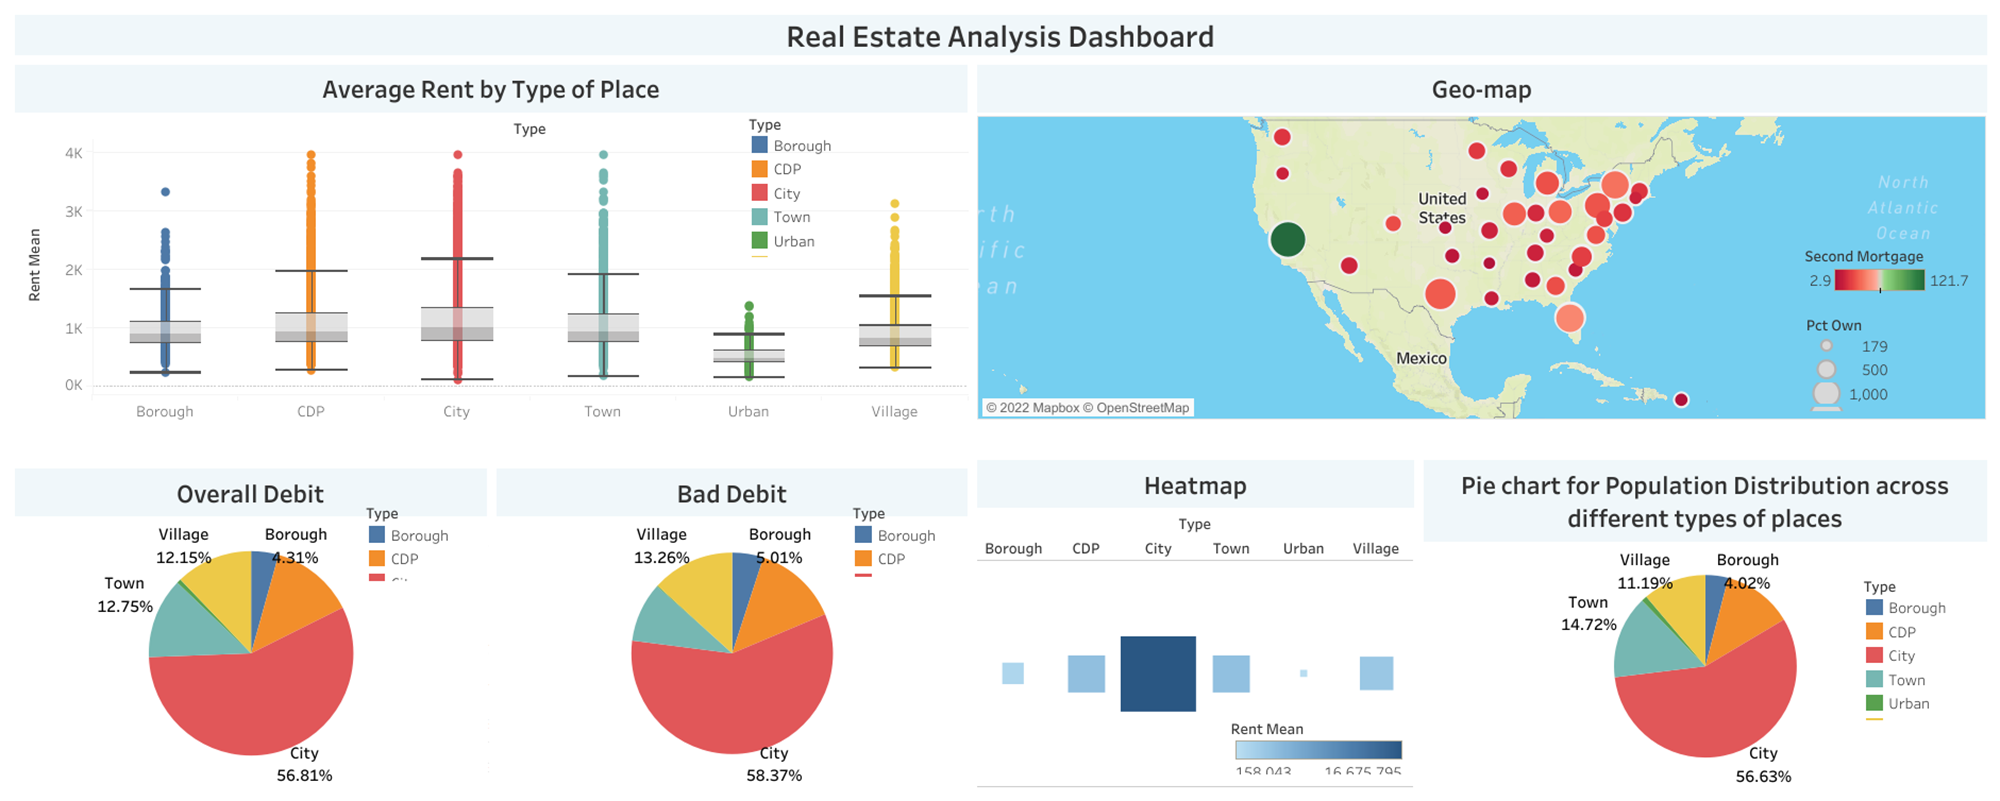

    a) Box plot of distribution of average rent by type of place (village, urban, town, etc.).
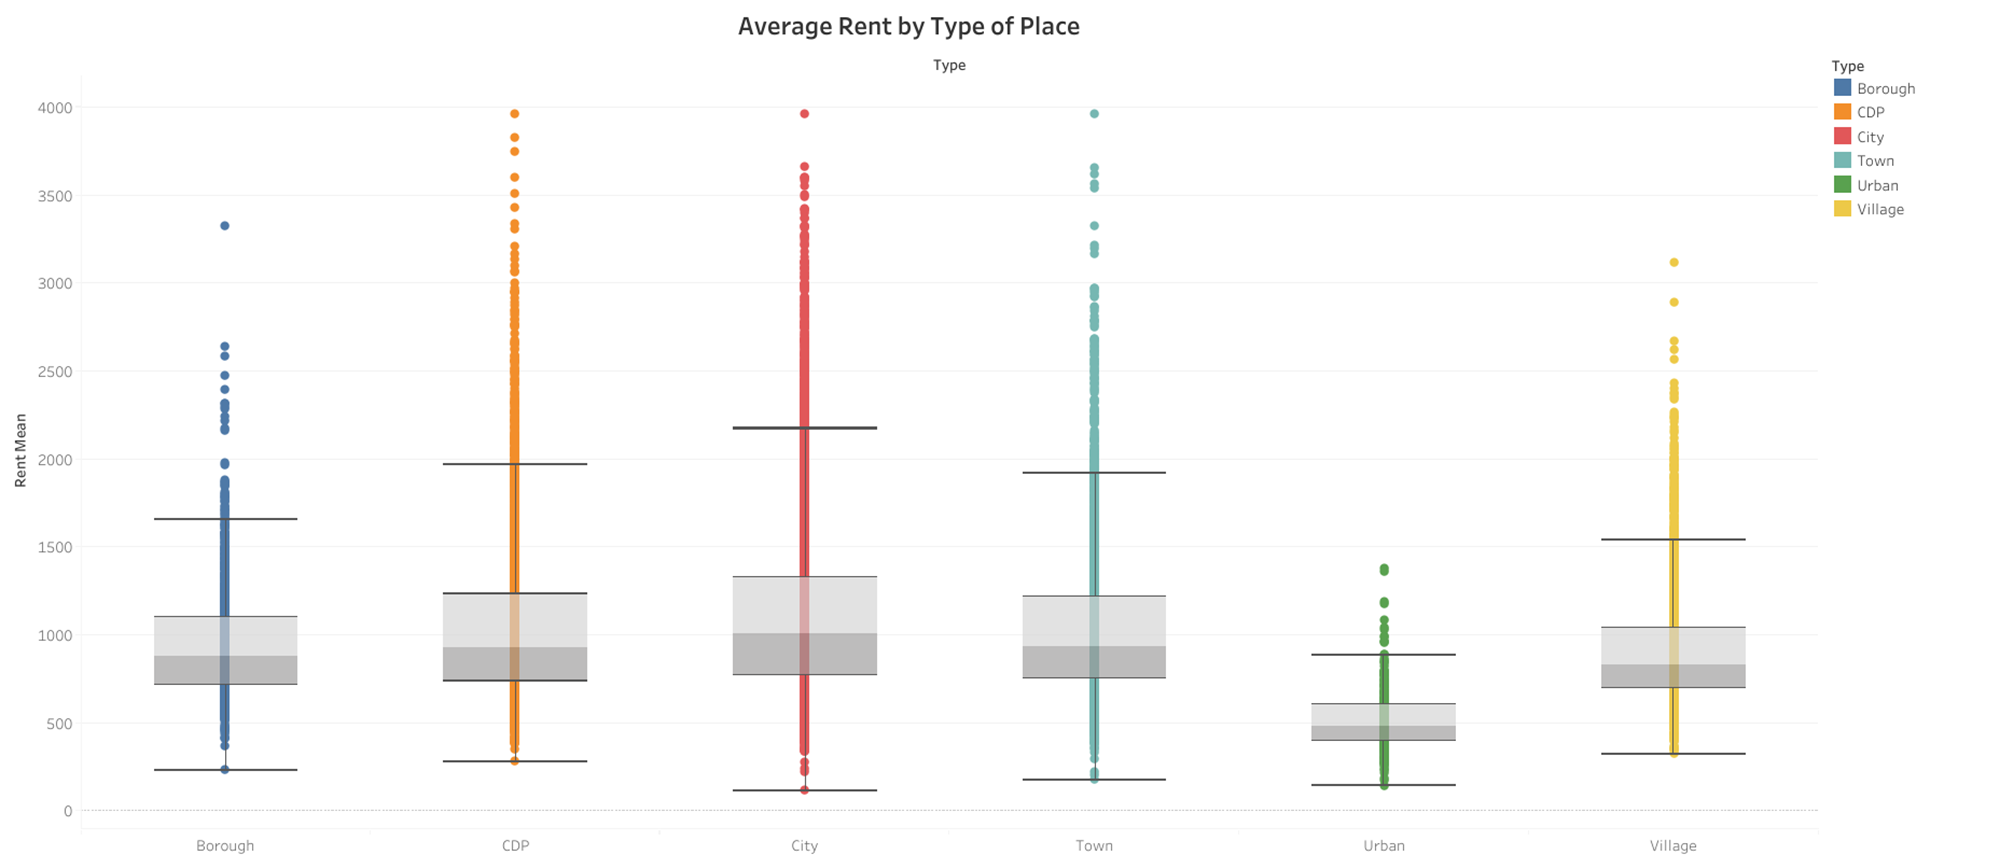

    b) Pie charts to show overall debt and bad debt.

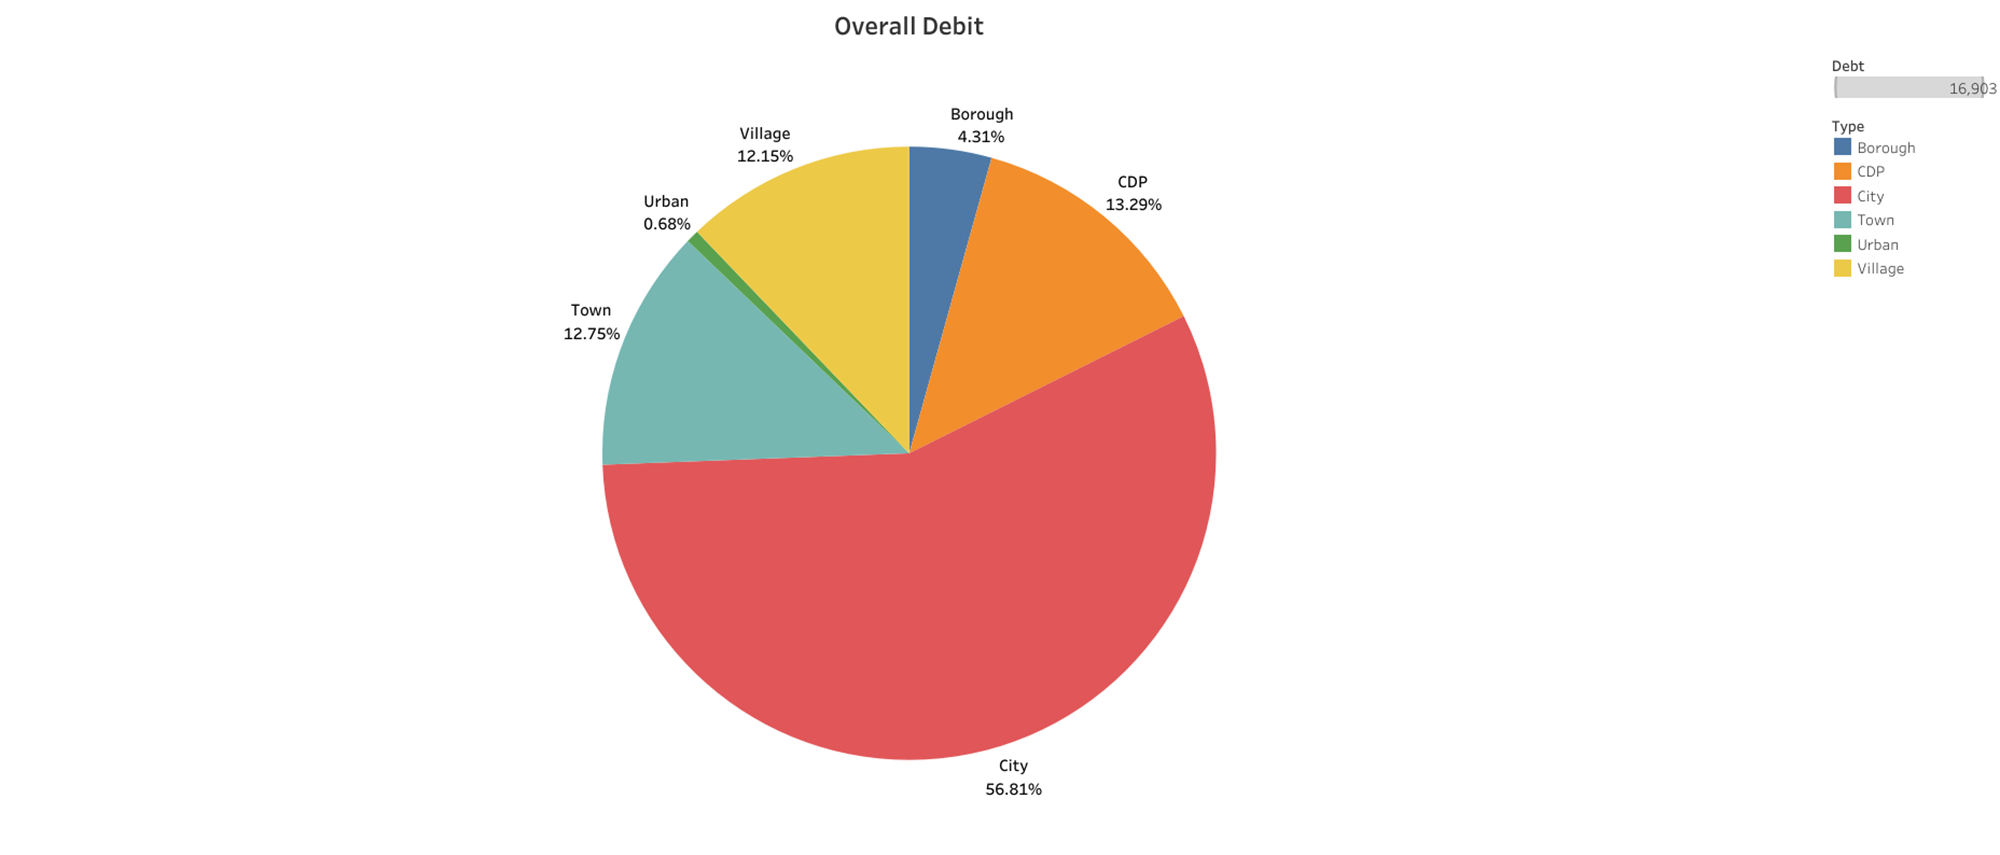
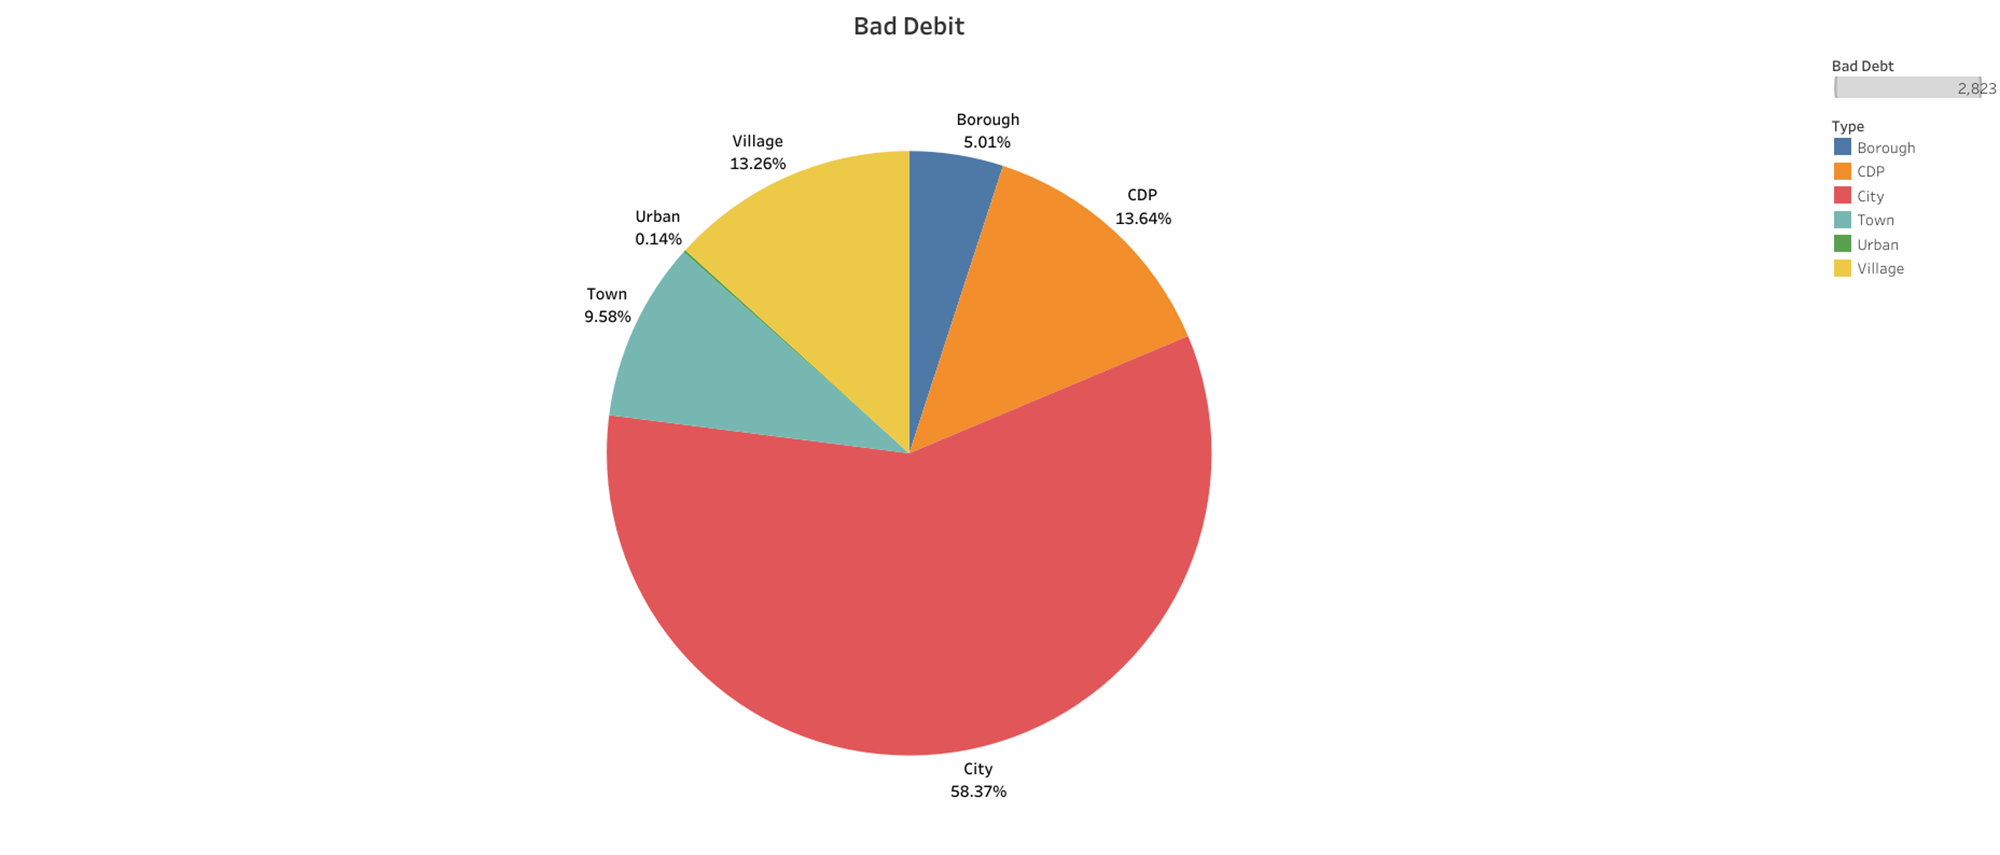

    c) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map.

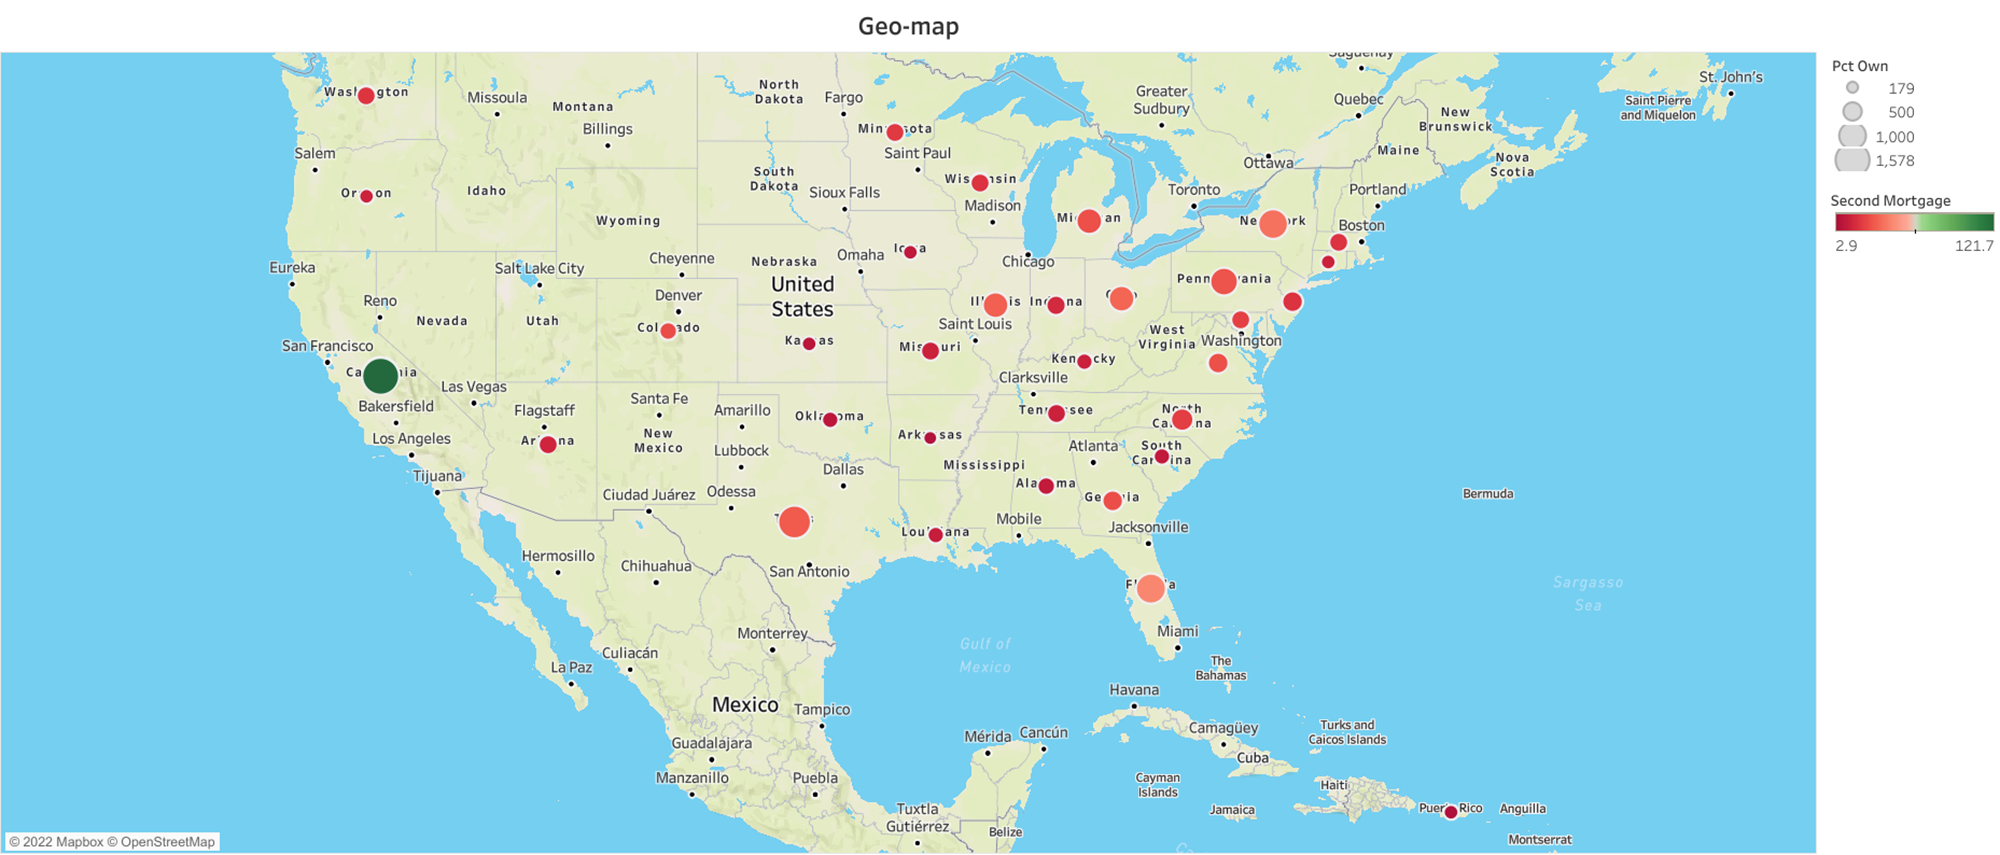

    d) Heat map for correlation matrix.

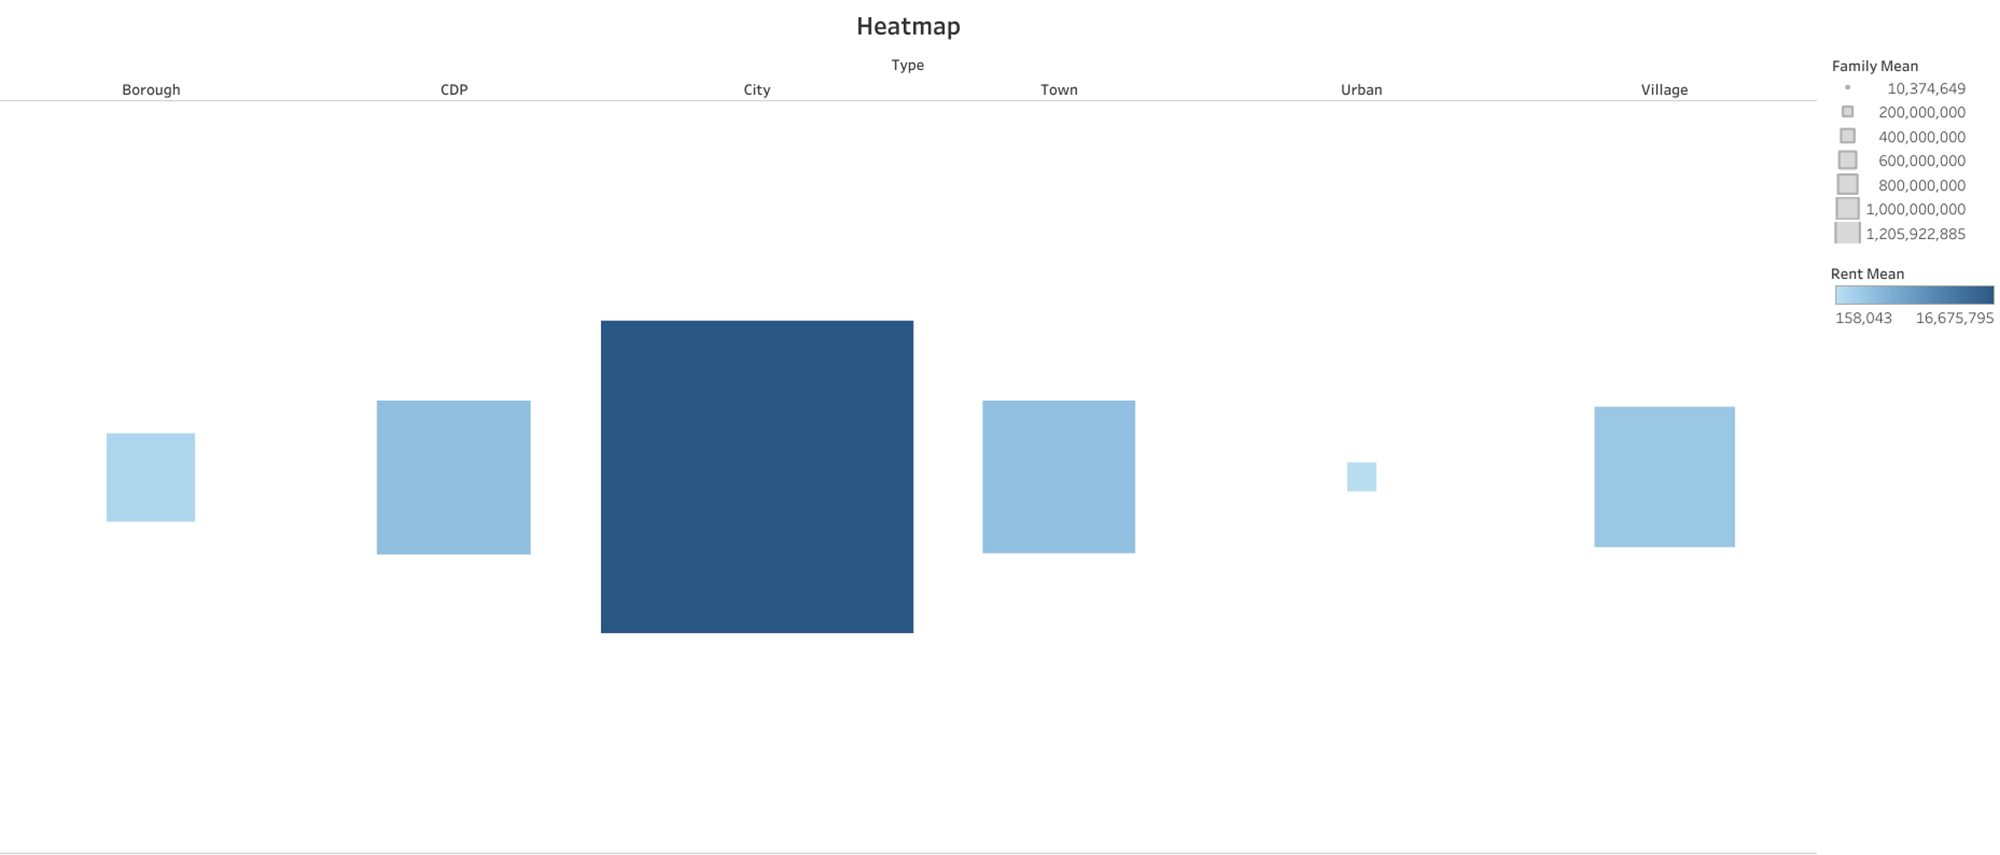

    e) Pie chart to show the population distribution across different types of places (village, urban, town etc.)
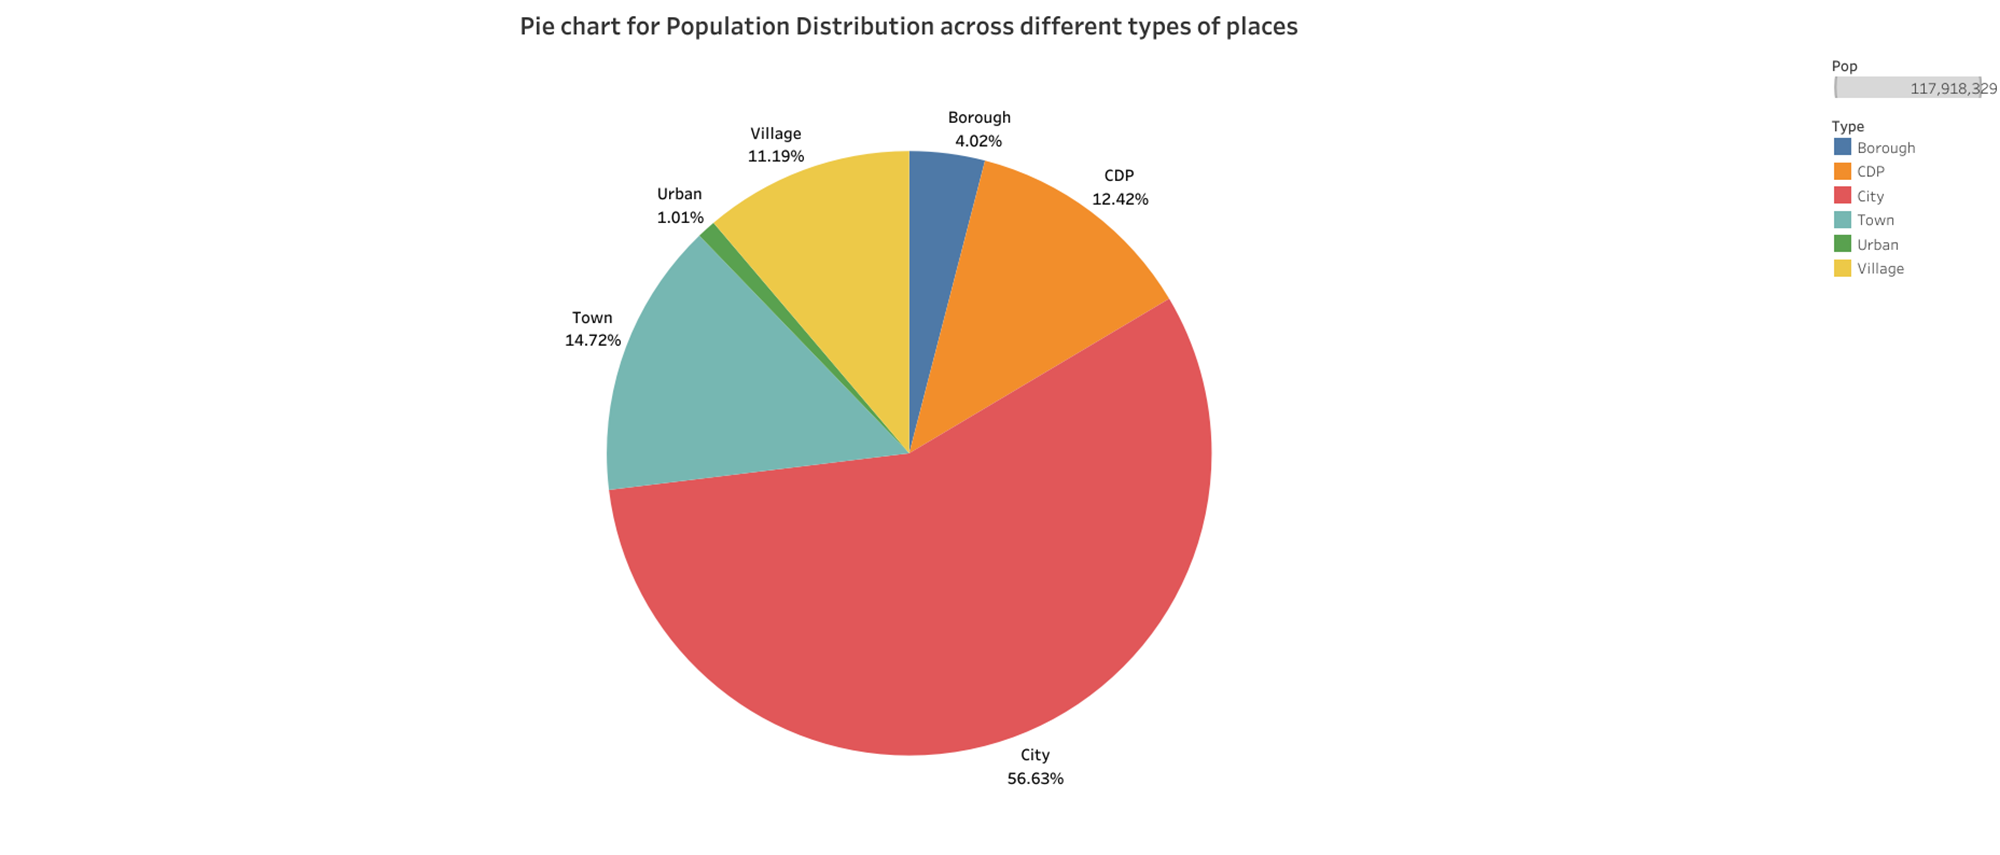
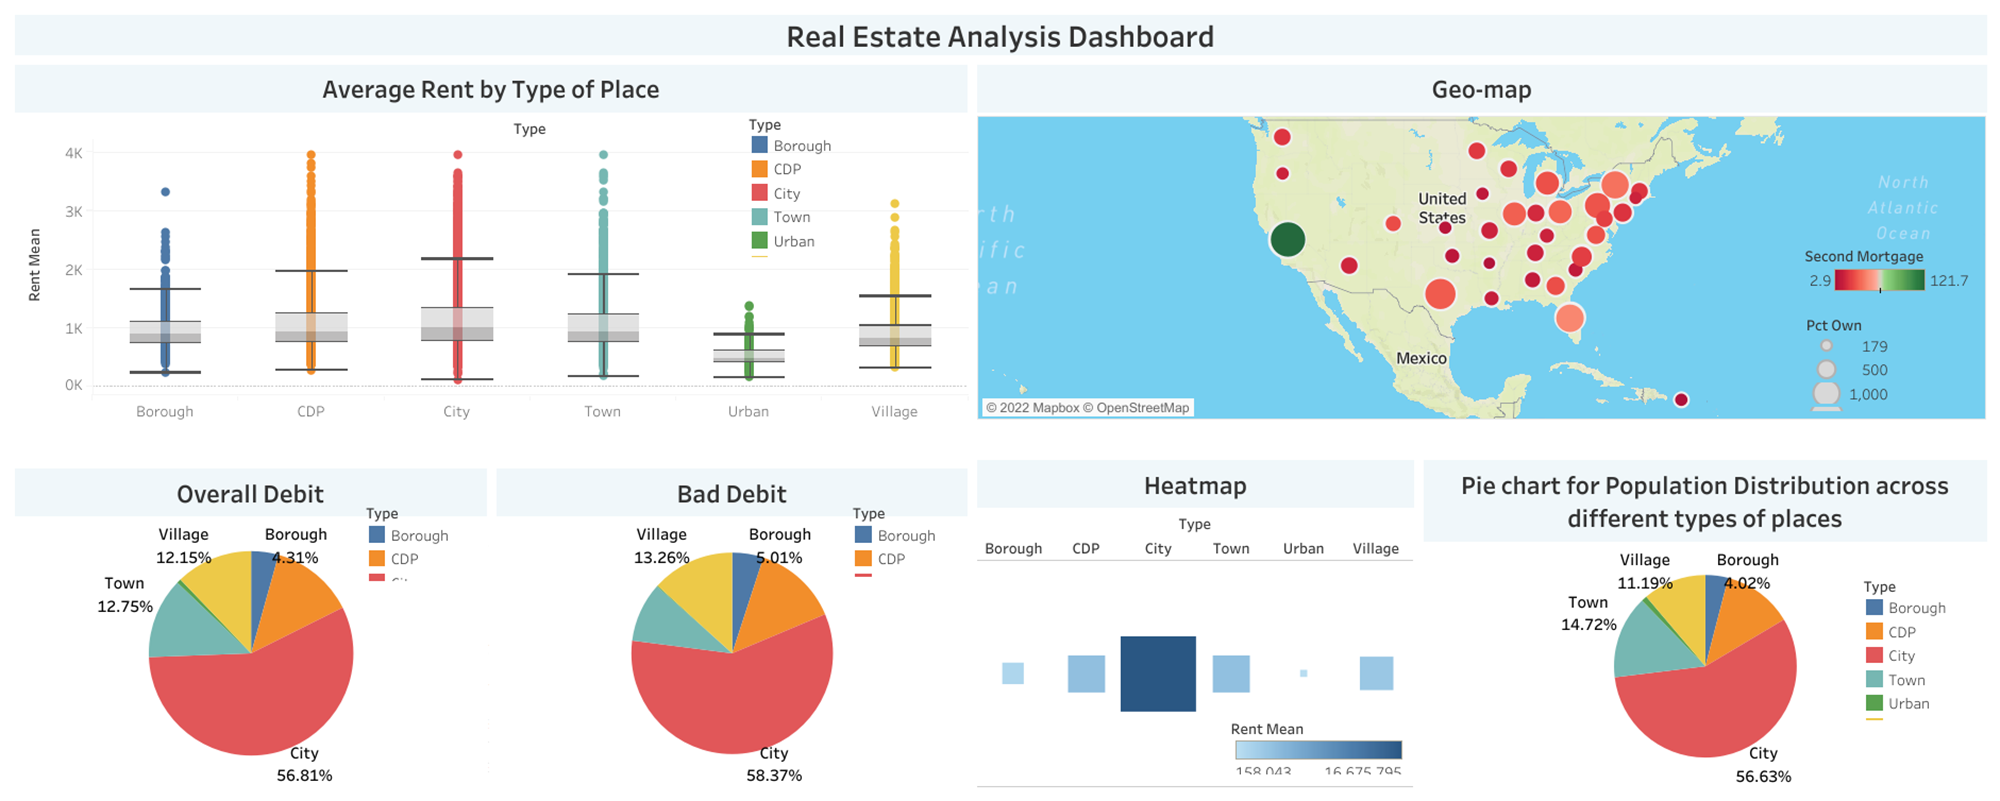